In [1]:
import stablerank.srank as sr
import geometry_objects_2021 as ge


from ripser import ripser

import _pickle as pickle

import numpy as np
inf=float("inf")

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.spatial as spatial

from scipy.spatial.distance import cdist, pdist, squareform

import scipy.stats as st


In [2]:
data = [[0,0], [1,1],[2,1],[3,2],[-1,1],[4,2],[-1,-1],[2,-1]]
dist = spatial.distance.pdist(data, "euclidean")

## From distance to dendrogram

[[ 1.          2.          1.          2.        ]
 [ 3.          5.          1.          2.        ]
 [ 0.          4.          1.41421356  2.        ]
 [ 6.         10.          2.          3.        ]
 [ 7.          8.          2.23606798  3.        ]
 [ 9.         12.          3.60555128  5.        ]
 [11.         13.          5.83095189  8.        ]]


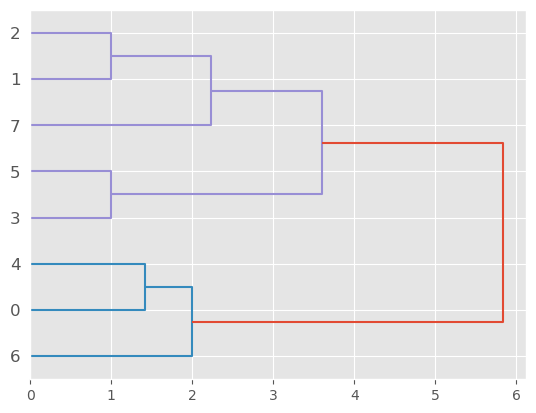

In [3]:
cm = "complete"

link = linkage(dist, cm)
print(link)
dn=dendrogram(link, orientation='right')

## From dendrogram to barcode

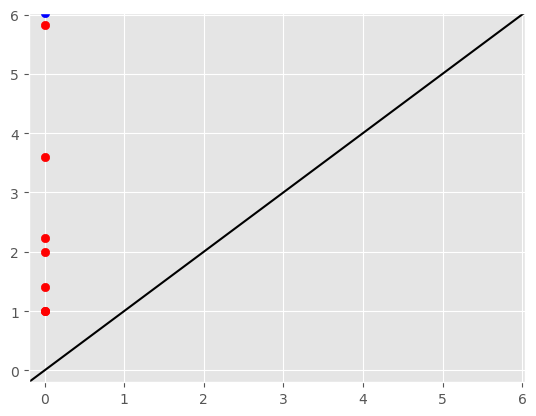

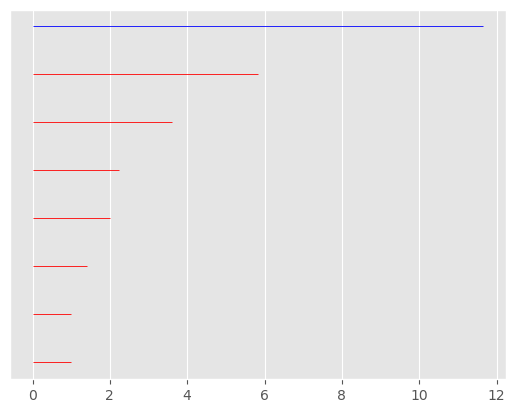

In [5]:
b = sr.linkage_to_bc(link)

print("type of b: ", type(b))

plt.figure("persitance diagram")
b.persistence_diagram()

plt.figure("bar code")
b.plot()

## From bar code to PCF

<class 'stablerank.rtorf.Pcnif'>


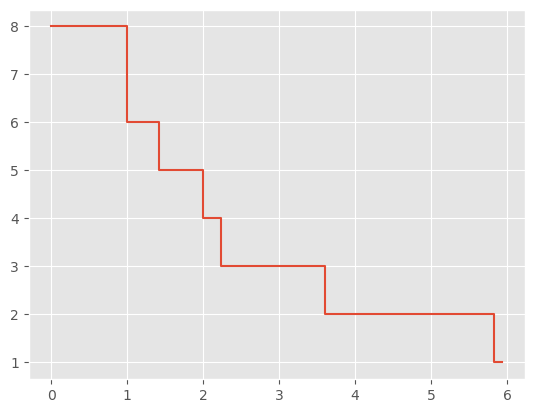

In [9]:
f = b.stable_rank()
print(type(f))
f.plot()

## From distance to PCF

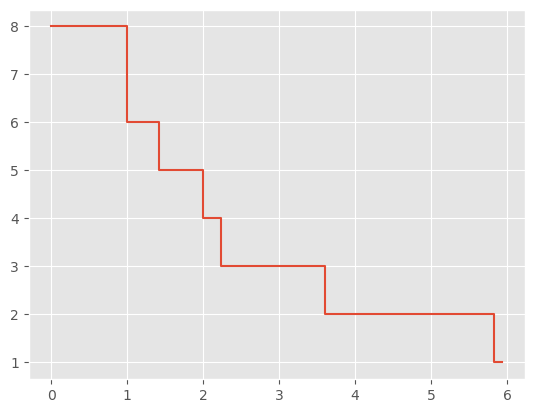

In [8]:
D = sr.Distance(squareform(dist))
g = D.get_h0sr(clustering_method=cm, reduced=False)
g.plot()

In [14]:
a = np.array([[0,1,2,3],[1,-1,1,2]])
f = sr.Pcf(a)

b = np.array([[0,0.5,1.3,3],[1,3,1,2]])

g = sr.Pcf(b)

h =f*g

print("type of f:", type(f))
print("content of f:")
print(f.content)
print("*"*30)
print("content of g:")
print(g.content)
print("*"*30)
print("content of h=g*f:")
print(h.content)



type of f: <class 'stablerank.rtorf.Pcf'>
content of f:
[[ 0  1  2  3]
 [ 1 -1  1  2]]
******************************
content of g:
[[0.  0.5 1.3 3. ]
 [1.  3.  1.  2. ]]
******************************
content of h=g*f:
[[ 0.   0.5  1.   1.3  2.   3. ]
 [ 1.   3.  -3.  -1.   1.   4. ]]


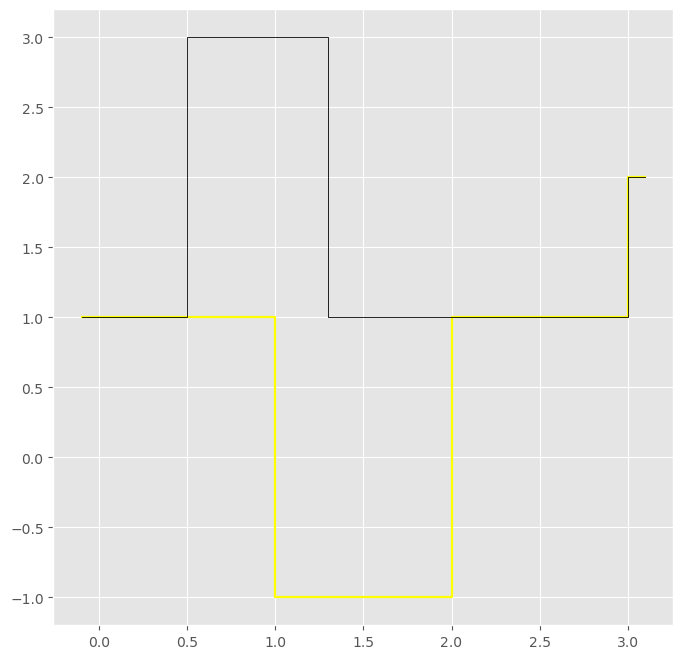

In [23]:
plt.figure(figsize=(8,8))
f.plot(color="yellow", linewidth=1.6)
g.plot(color="black", linewidth=0.6)

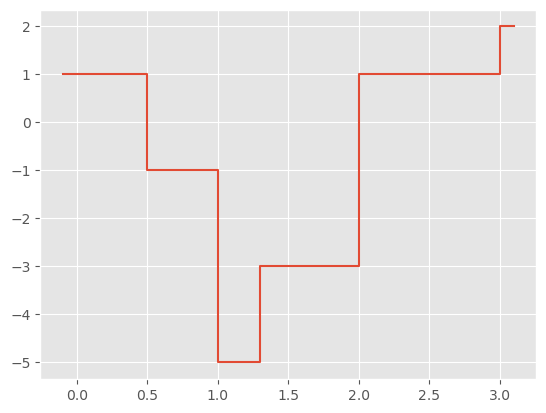

In [25]:
a = 2*f-g
a.plot()

## Circle and Square

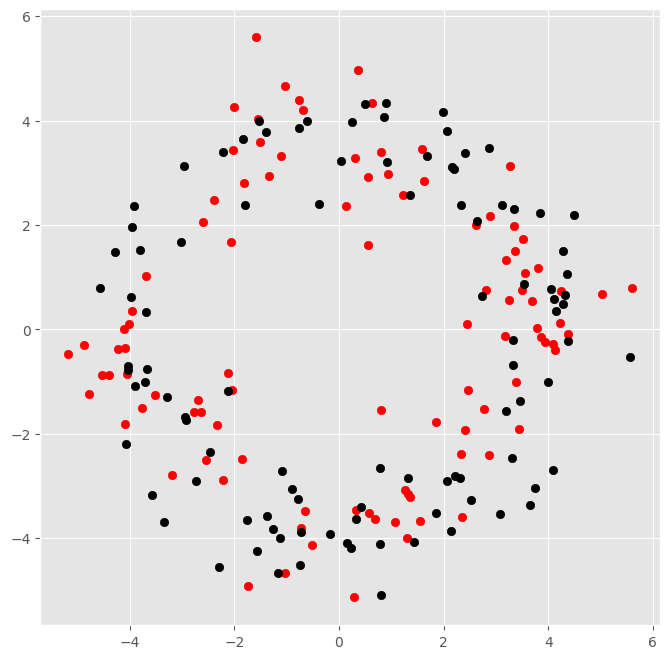

In [17]:
center = np.array([0,0], dtype="double")
r = np.double(4)


vertices = [[0,4.6], [-4.6,0],[0,-4.6],[4.6,0]]

number_points = 100
error = 1


circle = ge.circle(center,r,number_points, error)

square = ge.closed_path(vertices, number_points, error)

plt.figure(figsize=(8,8))
plt.scatter(square[:,0], square[:,1], color="red")
plt.scatter(circle[:,0], circle[:,1], color="black")

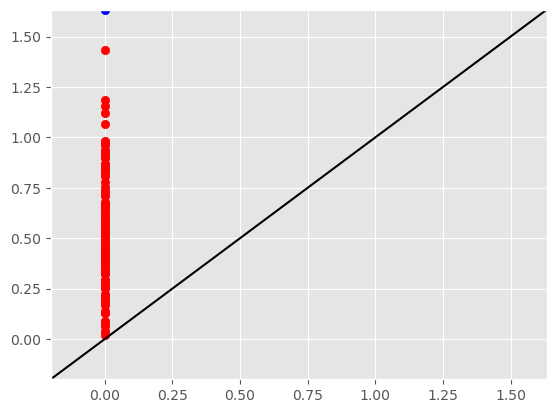

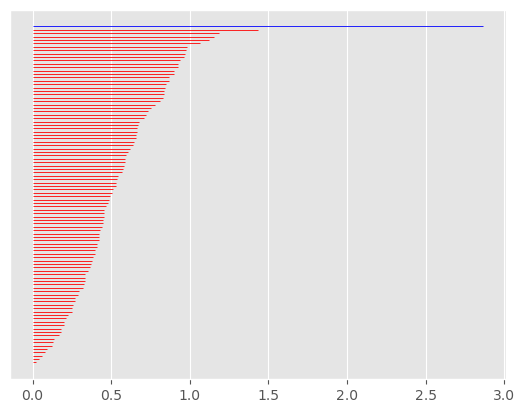

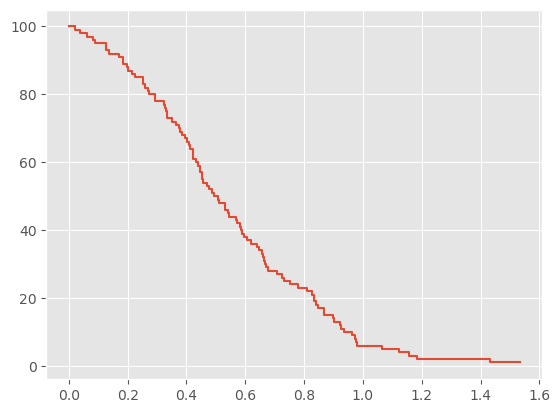

In [28]:
cm = "single"

dist = spatial.distance.pdist(circle, "euclidean")

link = linkage(dist, cm)

b = sr.linkage_to_bc(link)
f_circle = sr.linkage_to_sr(link)

plt.figure("persitance diagram")
b.persistence_diagram()

plt.figure("bar code")
b.plot()

plt.figure("pcf")
f_circle.plot()

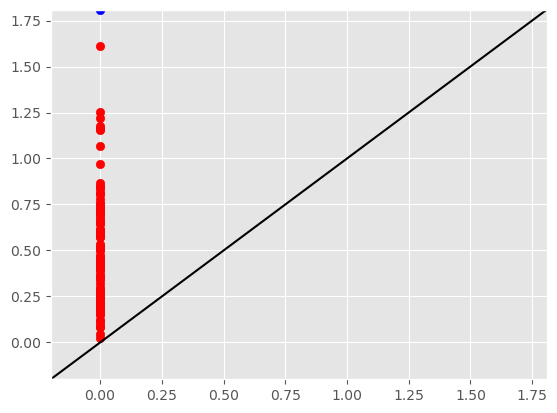

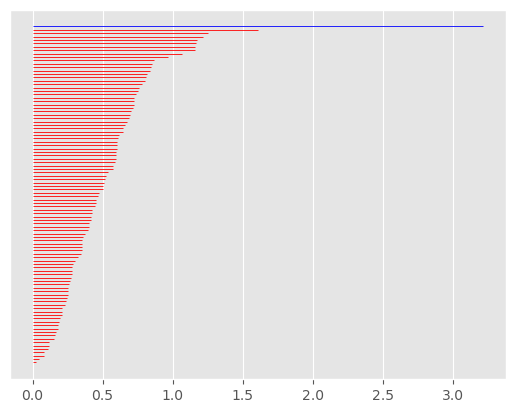

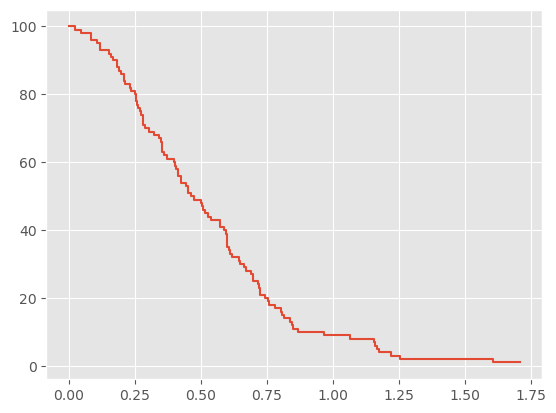

In [29]:
cm = "single"

dist = spatial.distance.pdist(square, "euclidean")

link = linkage(dist, cm)

b = sr.linkage_to_bc(link)
f_square = sr.linkage_to_sr(link)

plt.figure("persitance diagram")
b.persistence_diagram()

plt.figure("bar code")
b.plot()

plt.figure("pcf")
f_square.plot()

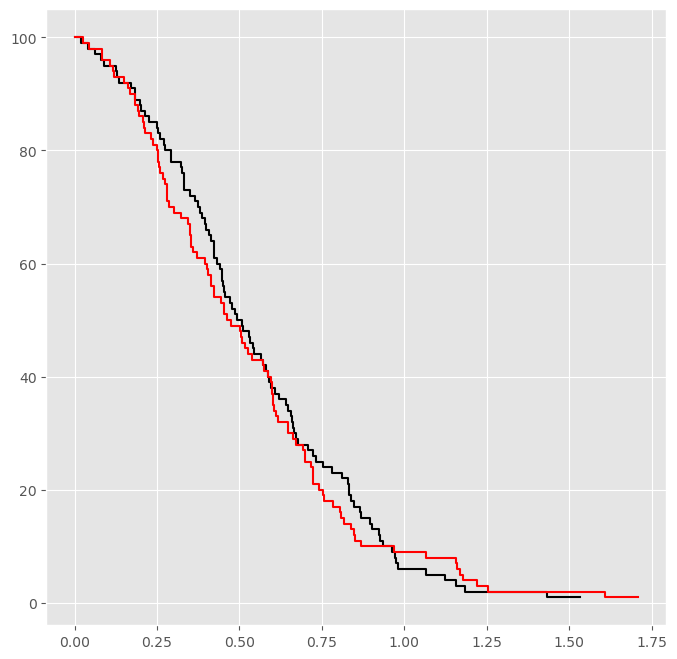

In [30]:
plt.figure(figsize=(8,8))
f_circle.plot(color="black")
f_square.plot(color="red")

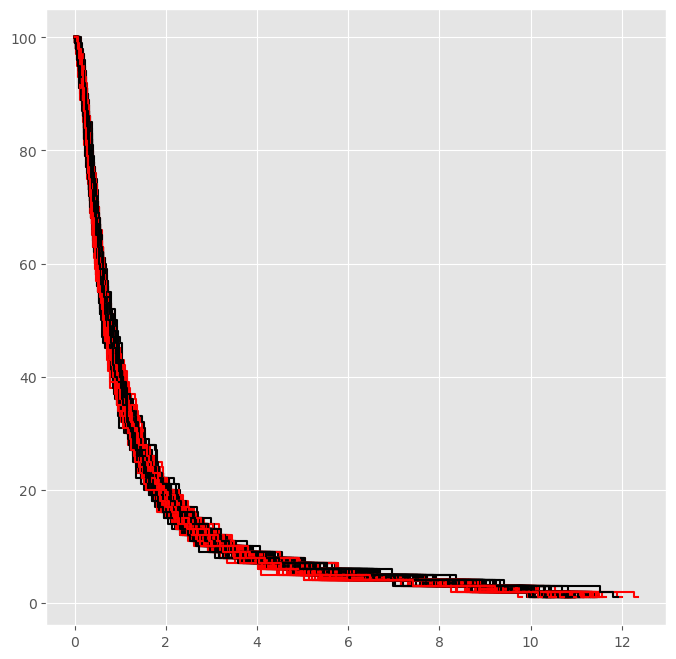

In [31]:
cm = "complete"

plt.figure(figsize=(8,8))

number_tries = 100
for i in range(number_tries):
    figure = ge.circle(center,r,number_points, error)
    dist = spatial.distance.pdist(figure, "euclidean")
    link = linkage(dist, cm)
    f_circle = sr.linkage_to_sr(link)
    f_circle.plot(color="black")
    
    figure = ge.closed_path(vertices, number_points, error)
    dist = spatial.distance.pdist(figure, "euclidean")
    link = linkage(dist, cm)
    f_square = sr.linkage_to_sr(link)
    f_square.plot(color="red")
    


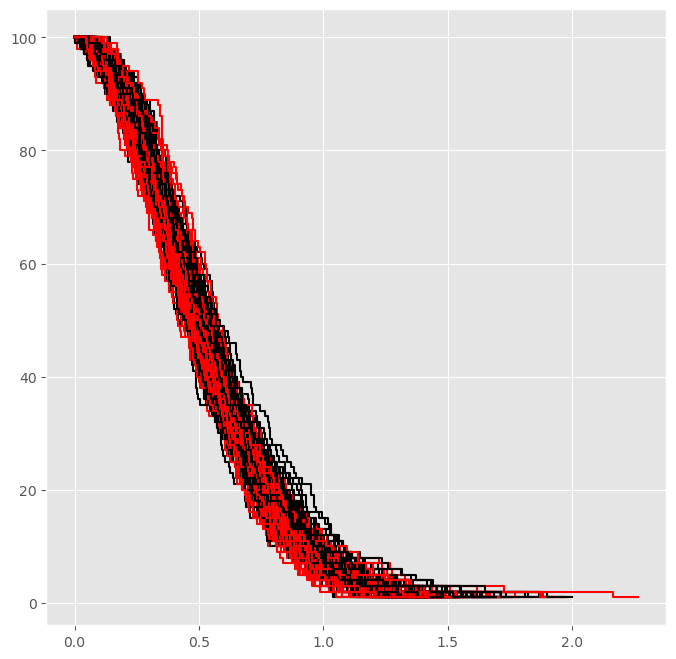

In [32]:
cm = "single"


plt.figure(figsize=(8,8))

number_tries = 100
for i in range(number_tries):
    figure = ge.circle(center,r,number_points, error)
    dist = spatial.distance.pdist(figure, "euclidean")
    link = linkage(dist, cm)
    f_circle = sr.linkage_to_sr(link)
    f_circle.plot(color="black")
    
    figure = ge.closed_path(vertices, number_points, error)
    dist = spatial.distance.pdist(figure, "euclidean")
    link = linkage(dist, cm)
    f_square = sr.linkage_to_sr(link)
    f_square.plot(color="red")
 

In [33]:
cm = "complete"
f_circle = sr.zero_pcnif()
f_square = sr.zero_pcnif()

number_tries = 1000
for i in range(number_tries):
    circle = ge.circle(center,r,number_points, error)
    dist = spatial.distance.pdist(circle, "euclidean")
    link = linkage(dist, cm)
    f_circle += sr.linkage_to_sr(link)

    square = ge.closed_path(vertices, number_points, error)
    dist = spatial.distance.pdist(square, "euclidean")
    link = linkage(dist, cm)
    f_square += sr.linkage_to_sr(link)
    
f_circle = f_circle * (1/number_tries) 
f_square = f_square * (1/number_tries) 

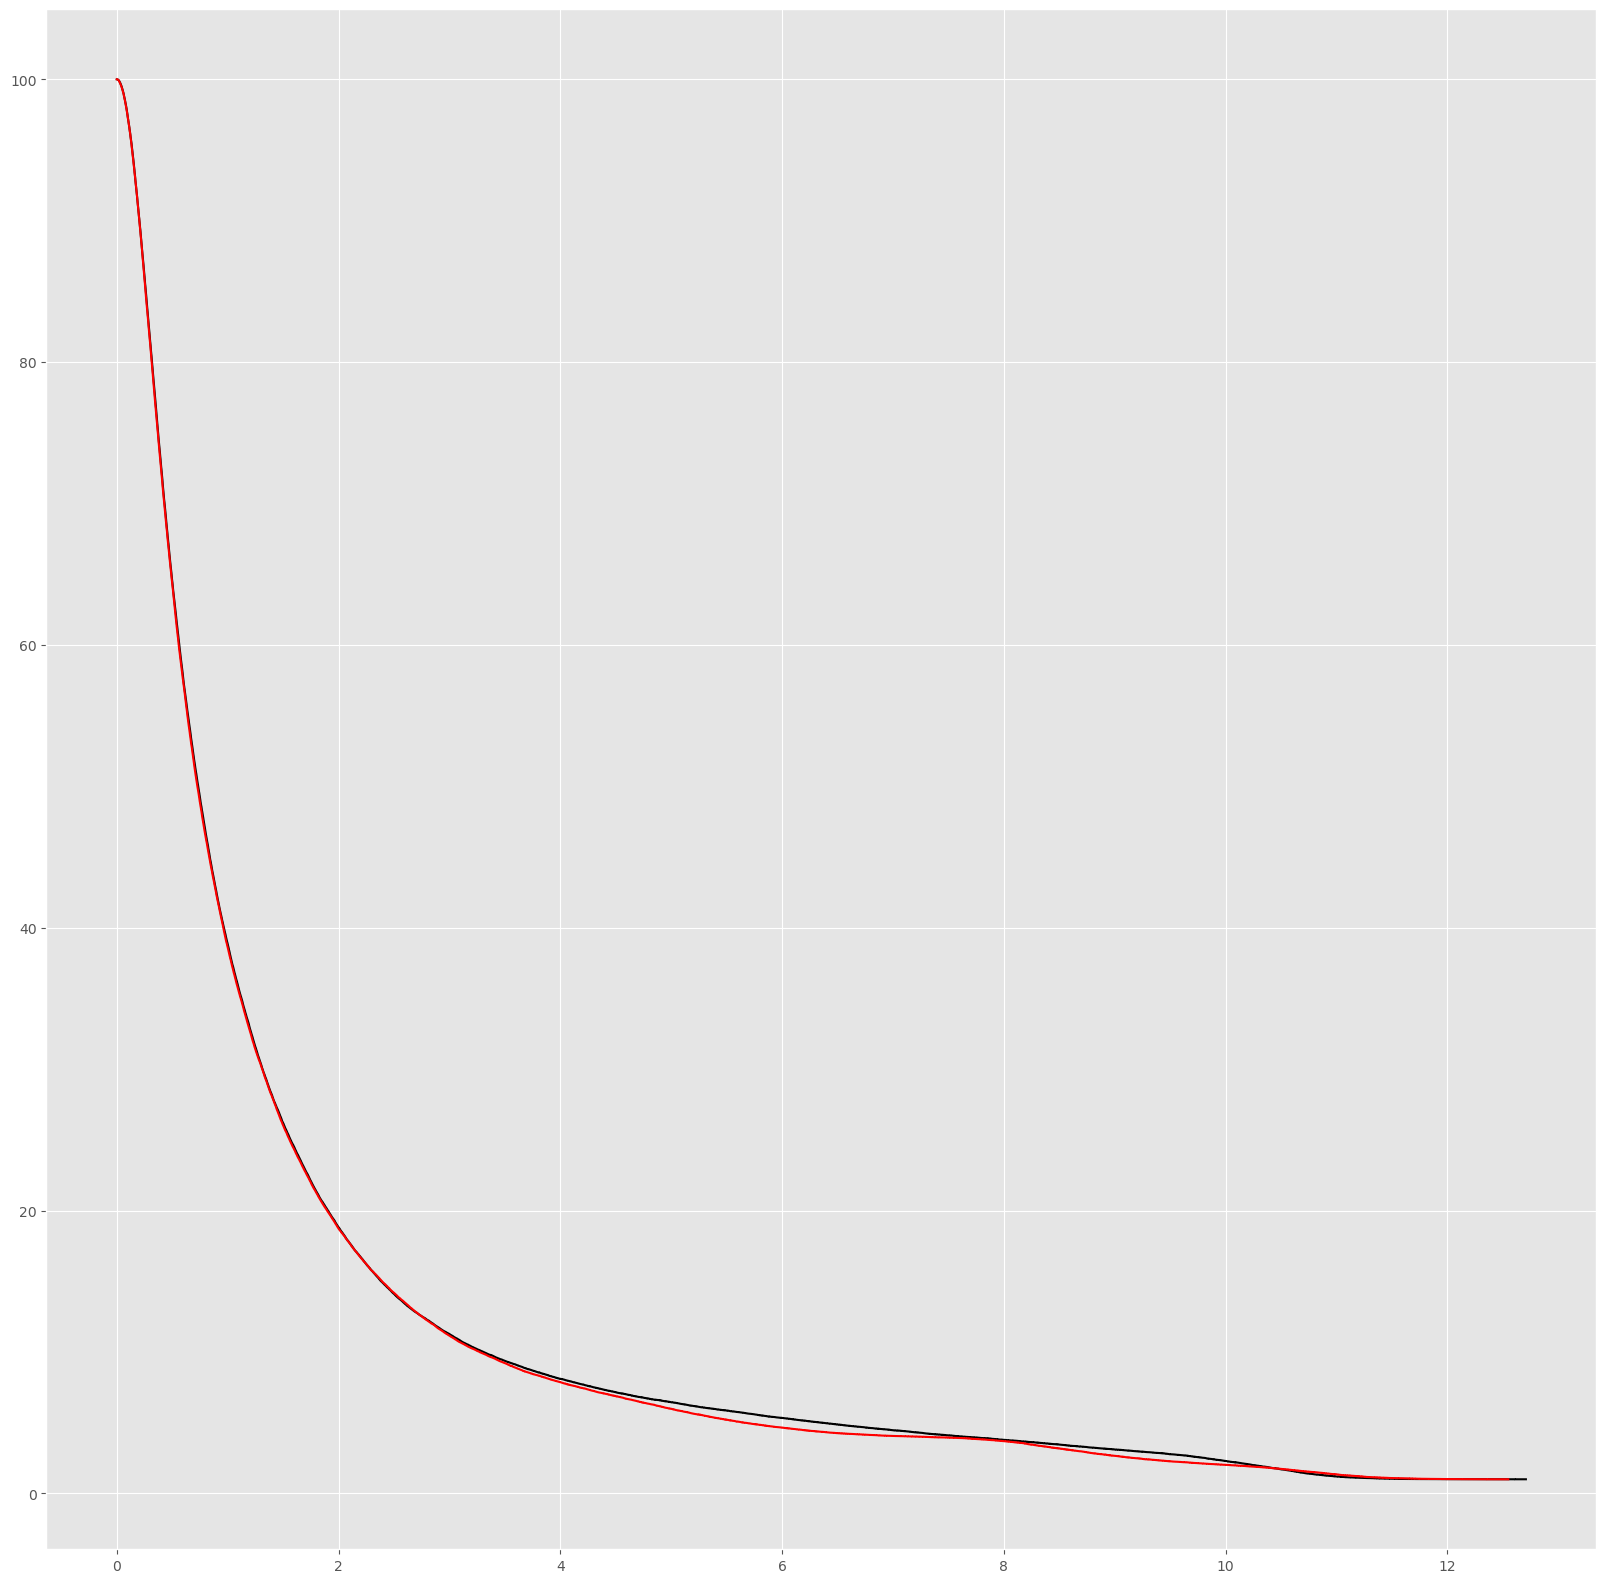

In [24]:
plt.figure(figsize=(20,20))
f_circle.plot(color="black")
f_square.plot(color="red")

In [34]:
cm = "single"
f_circle = sr.zero_pcnif()
f_square = sr.zero_pcnif()

number_tries = 1000
for i in range(number_tries):
    circle = ge.circle(center,r,number_points, error)
    dist = spatial.distance.pdist(circle, "euclidean")
    link = linkage(dist, cm)
    f_circle += sr.linkage_to_sr(link)

    square = ge.closed_path(vertices, number_points, error)
    dist = spatial.distance.pdist(square, "euclidean")
    link = linkage(dist, cm)
    f_square += sr.linkage_to_sr(link)
    
f_circle = f_circle * (1/number_tries) 
f_square = f_square * (1/number_tries) 

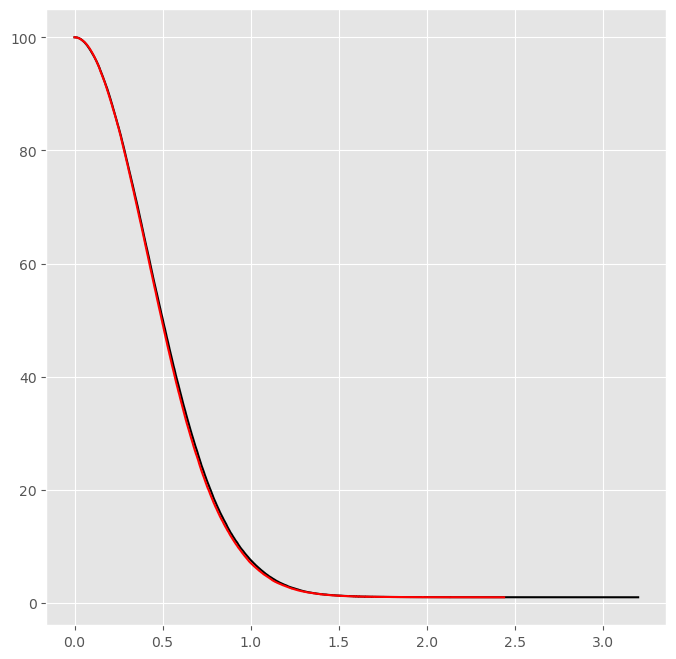

In [35]:
plt.figure(figsize=(8,8))
f_circle.plot(color="black")
f_square.plot(color="red")

In [37]:
cm = "complete"
circle_rep = []
square_rep = []

for j in range(10):
    f_circle = sr.zero_pcnif()
    f_square = sr.zero_pcnif()

    number_tries = 1000
    for i in range(number_tries):
        circle = ge.circle(center,r,number_points, error)
        dist = spatial.distance.pdist(circle, "euclidean")
        link = linkage(dist, cm)
        f_circle += sr.linkage_to_sr(link)
        
        square = ge.closed_path(vertices, number_points, error)
        dist = spatial.distance.pdist(square, "euclidean")
        link = linkage(dist, cm)
        f_square += sr.linkage_to_sr(link)
    
    f_circle = f_circle * (1/number_tries) 
    f_square = f_square * (1/number_tries) 
    circle_rep.append(f_circle)
    square_rep.append(f_square)

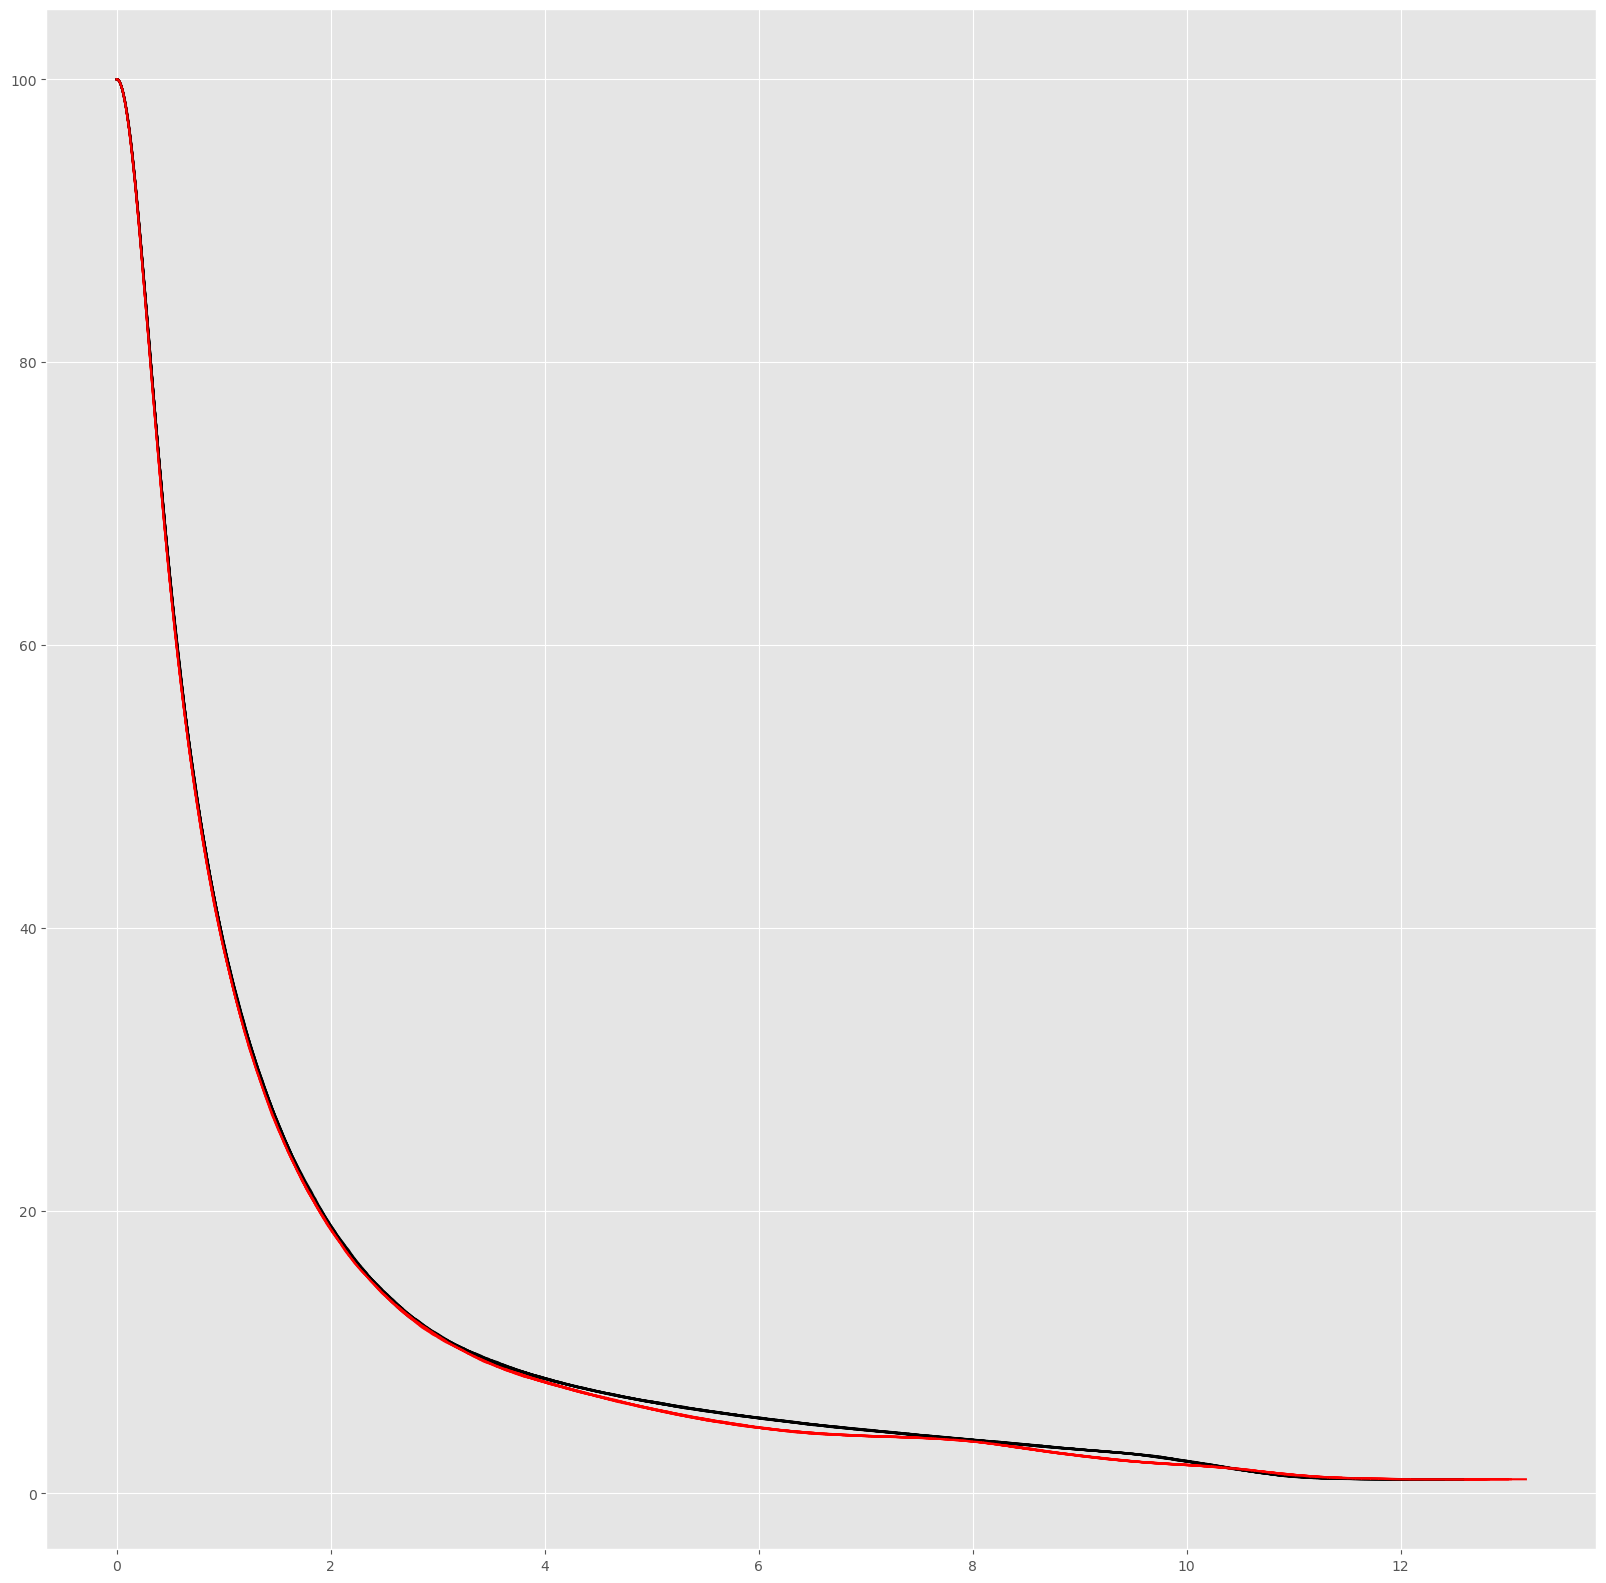

In [38]:
plt.figure(figsize=(20,20))
for j in range(10):
    circle_rep[j].plot(color="black")
    square_rep[j].plot(color="red")

In [40]:
cm = "single"

circle_rep = []
square_rep = []

for j in range(10):
    f_circle = sr.zero_pcnif()
    f_square = sr.zero_pcnif()

    number_tries = 1000
    for i in range(number_tries):
        circle = ge.circle(center,r,number_points, error)
        dist = spatial.distance.pdist(circle, "euclidean")
        link = linkage(dist, cm)
        f_circle += sr.linkage_to_sr(link)
        
        square = ge.closed_path(vertices, number_points, error)
        dist = spatial.distance.pdist(square, "euclidean")
        link = linkage(dist, cm)
        f_square += sr.linkage_to_sr(link)
    
    f_circle = f_circle * (1/number_tries) 
    f_square = f_square * (1/number_tries) 
    circle_rep.append(f_circle)
    square_rep.append(f_square)

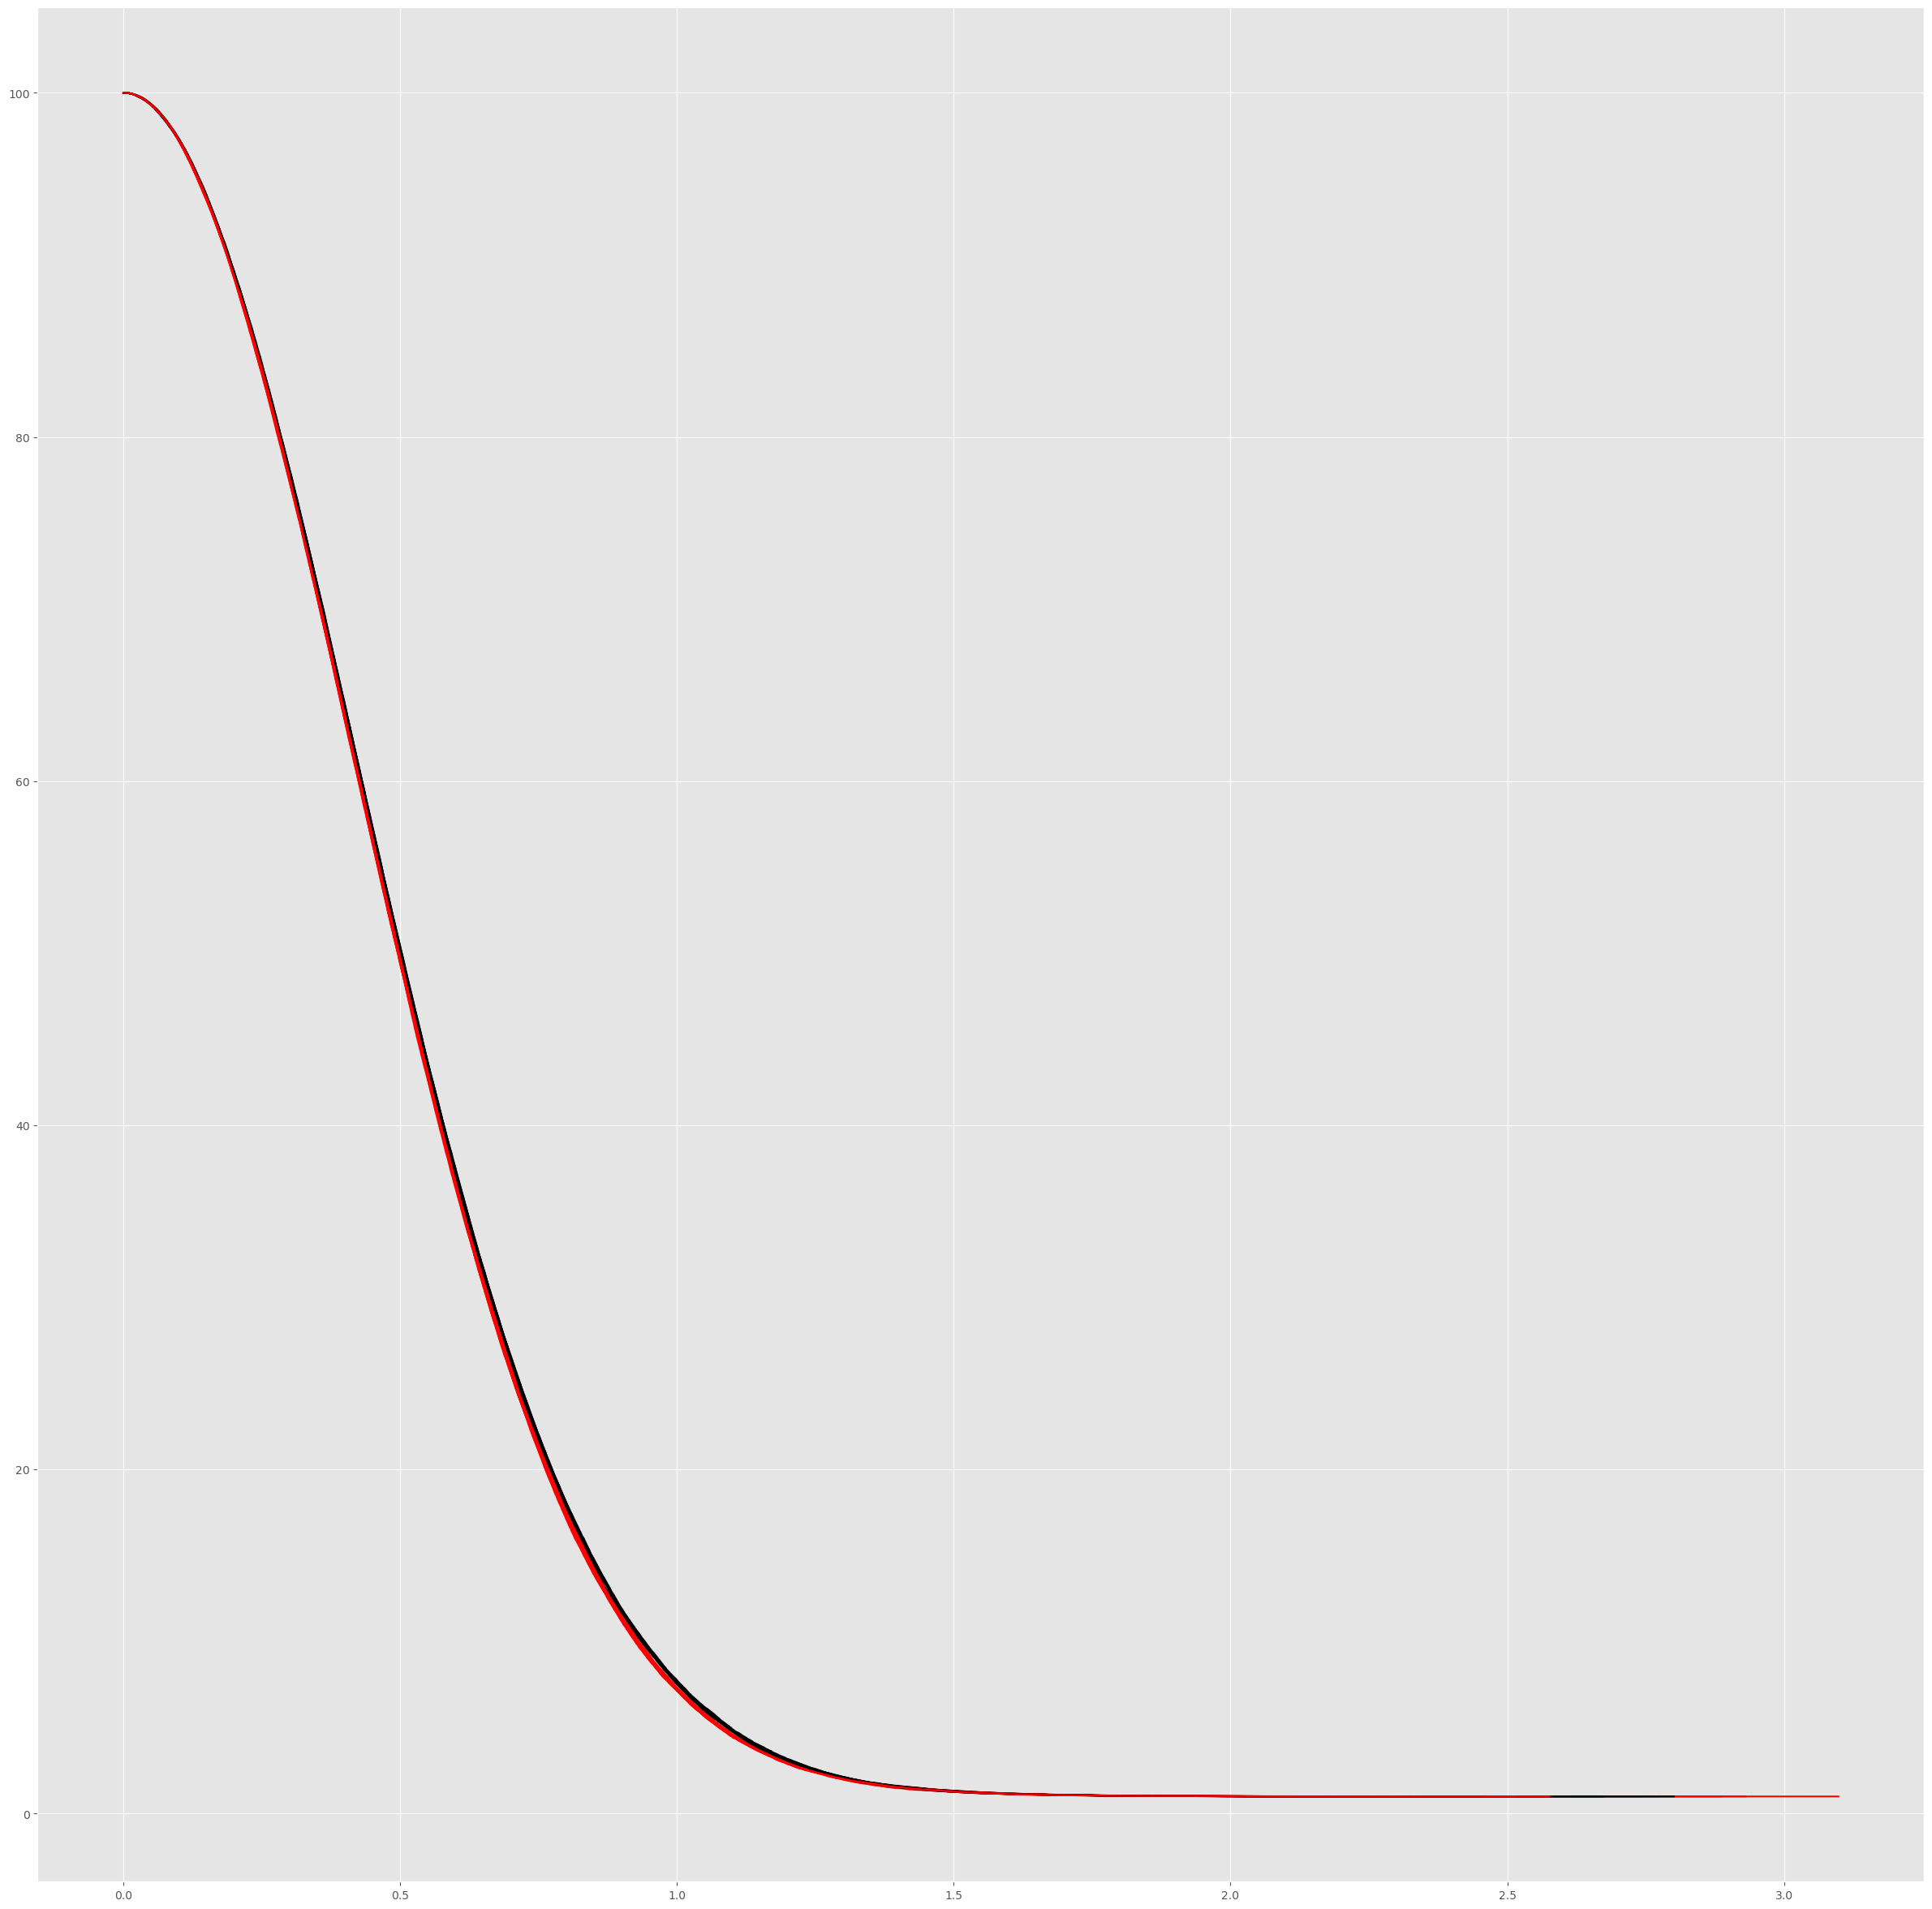

In [41]:
plt.figure(figsize=(30,30))
for j in range(10):
    circle_rep[j].plot(color="black")
    square_rep[j].plot(color="red")

# Data Analysis

<font size="4"> Data analysis is about discovering structures on the set $\mathcal{D}$ which can lead to understanding mechanisms behind the formation of the set D and these structures.</font>

# In or out

<font size="4">
- The data $\mathcal{D}$ is given by 250 points in the plane $\mathbb{R}^2$:
</font>

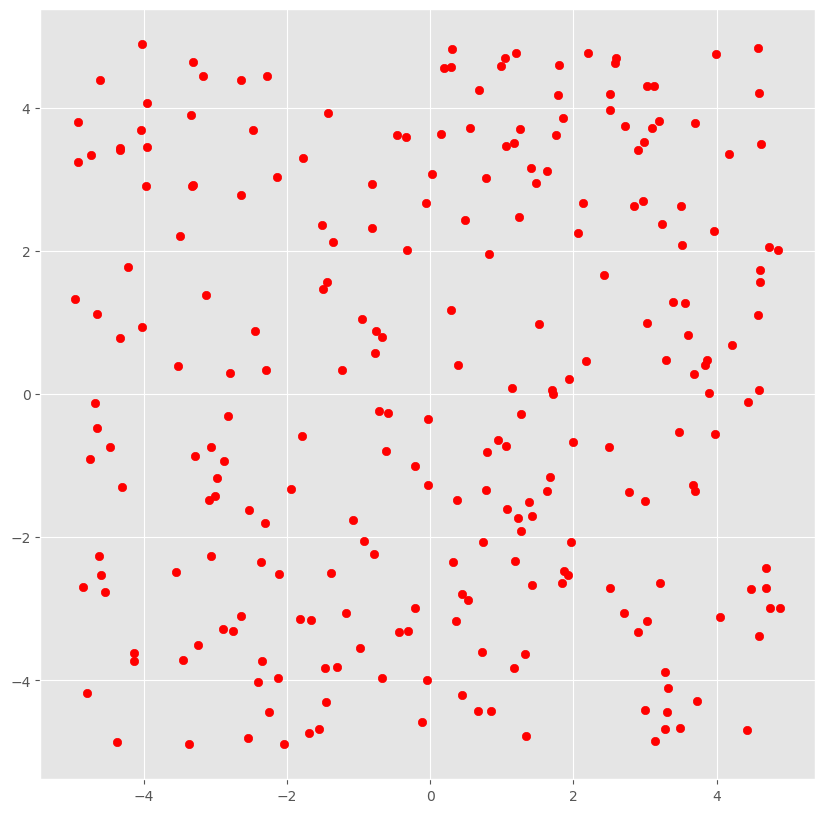

In [45]:
file = open("Data/in_out_index", "rb")
in_out_index = pickle.load(file)
x = [p[0] for p in in_out_index]
y = [p[1] for p in in_out_index]
plt.figure(figsize=(10,10))

plt.scatter(x, y, color = "red")

#plt.savefig('points_in_plane.png', dpi=300, bbox_inches='tight')

-  <font size="4">The input is given by: $\mathcal{I}=\{X_d\}_{d\in \mathcal{D}}$.</font>

- <font size="4"> Every element $d$ in $\mathcal{D}$ is represented by a set $X_d =\{S_0,\ldots, S_{69}\}$ of size $70$
whose elements are called instances.</font>
- <font size="4"> Every element $S_i$ in $X_d$ is a subset of $\mathbb{R}^2$ of size 10.</font>

For example:



In [54]:
file = open("Data/in_out_mod_data", "rb")
in_out_mod_data = pd.read_pickle(file)

In [56]:
print(in_out_mod_data.shape)

(250, 70)


In [58]:
print(in_out_mod_data.iat[0,1])

[[-1.09023507  4.70179393]
 [-1.47725985  5.0513757 ]
 [-1.23663469  4.89303962]
 [-0.87954048  4.50625367]
 [-1.08348695  4.33872015]
 [-1.41648525  5.12617275]
 [-1.23946581  4.44053211]
 [-0.86814632  4.79479715]
 [-1.21792719  4.75149273]
 [-0.75880813  3.64266912]]


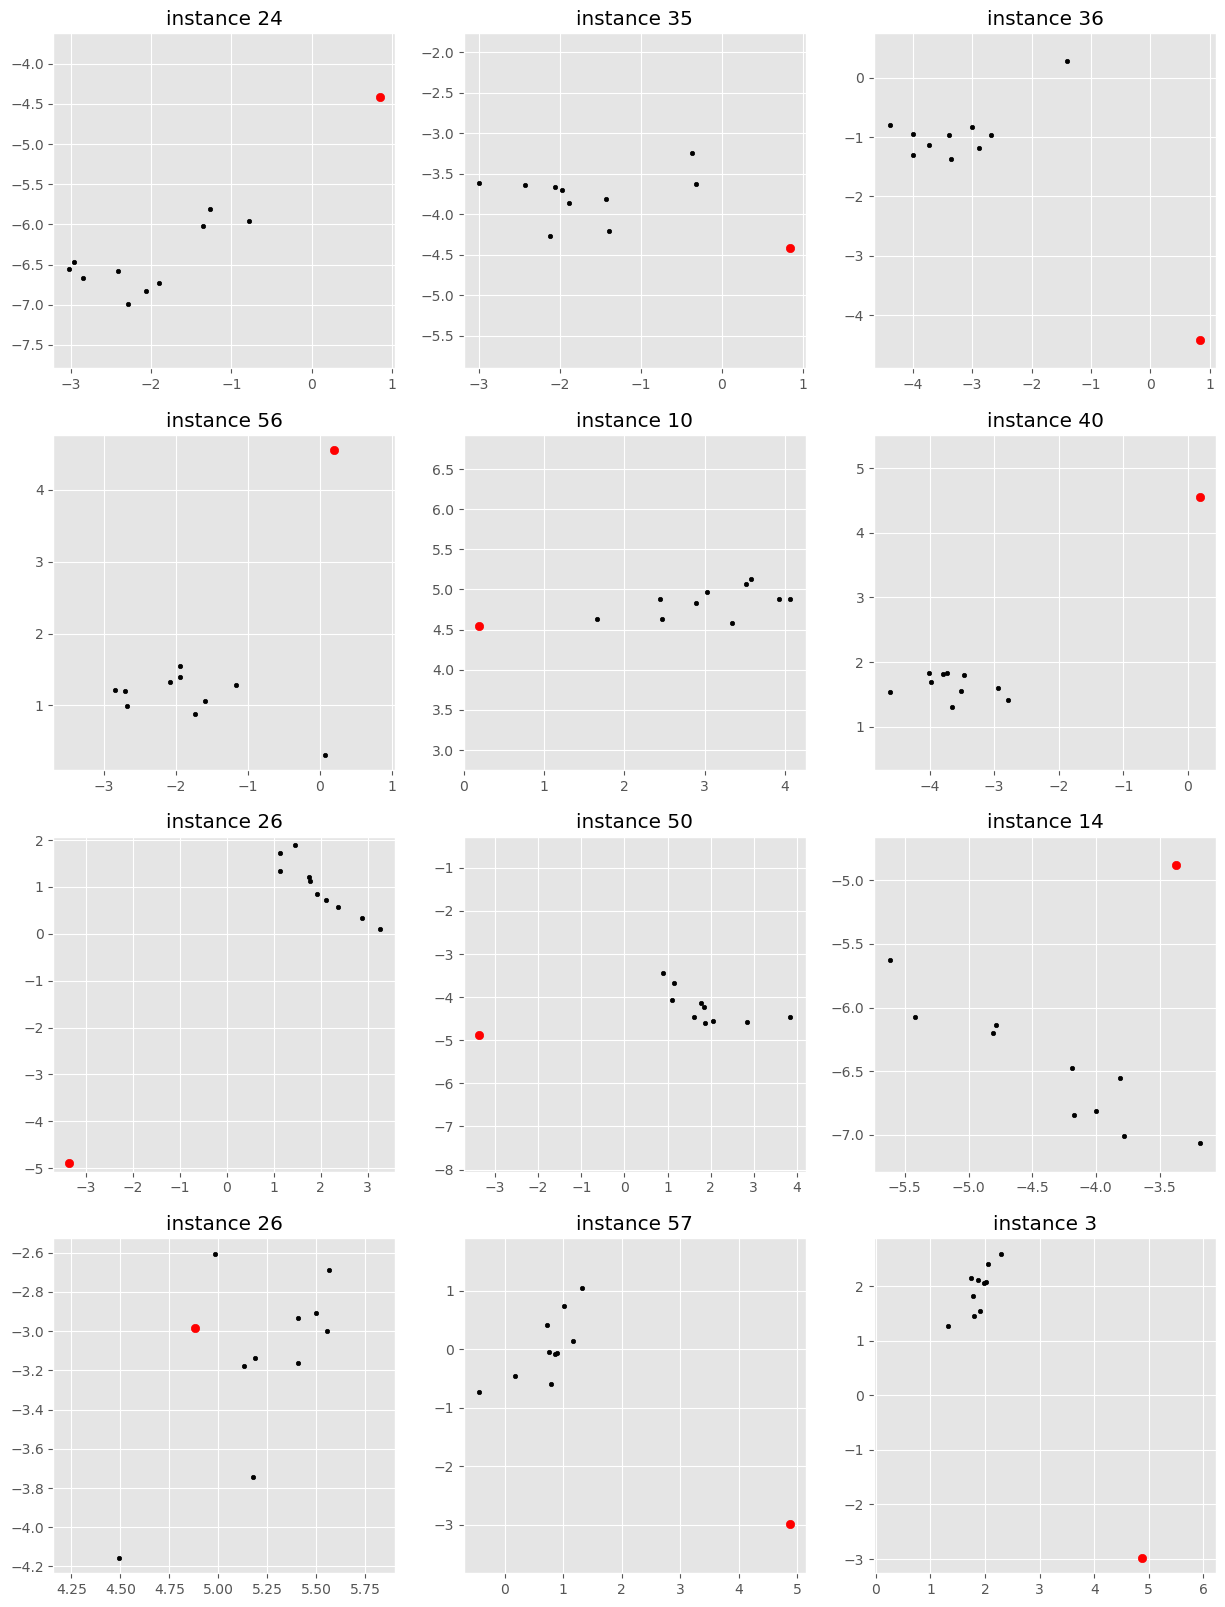

In [60]:
some_points = np.random.choice(250, 4, replace=False)
plt.figure(figsize=(15, 20))
i=1
for p in some_points:
    some_inst = np.random.choice(70,3, replace=False)
    for inst in some_inst:
        point = in_out_index[p]
        ax = plt.subplot(4,3,i)
        plt.axis('equal')
        ax.set_title("instance "+str(inst))
        figure = in_out_mod_data.at[point,inst]
        x = figure[:,0]
        y= figure[:,1]
        plt.scatter(x,y, color = "black", s= 10)
        plt.scatter(point[0],point[1], c = "red")
        i = i+1       
#plt.savefig('instances.png', dpi=300, bbox_inches='tight')

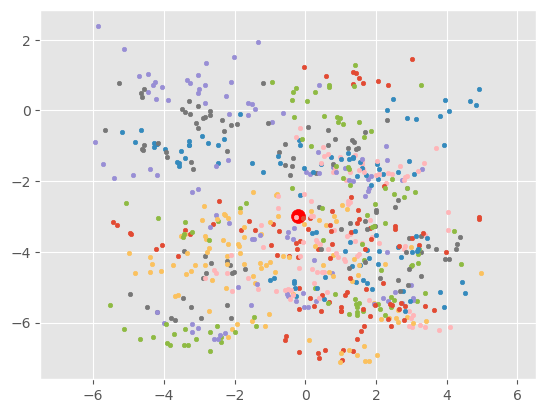

In [62]:
fig=plt.figure()
plt.axis('equal')
d = in_out_index[108]
plt.scatter(d[0],d[1],s = 100, c = "red")
inst = 0
while inst < 70:
    figure = in_out_mod_data.at[d,inst]
    x = figure[:,0]
    y = figure[:,1]
    plt.scatter(x,y,s=10)
    inst = inst+1
#plt.savefig('point_instances.png', dpi=300, bbox_inches='tight')

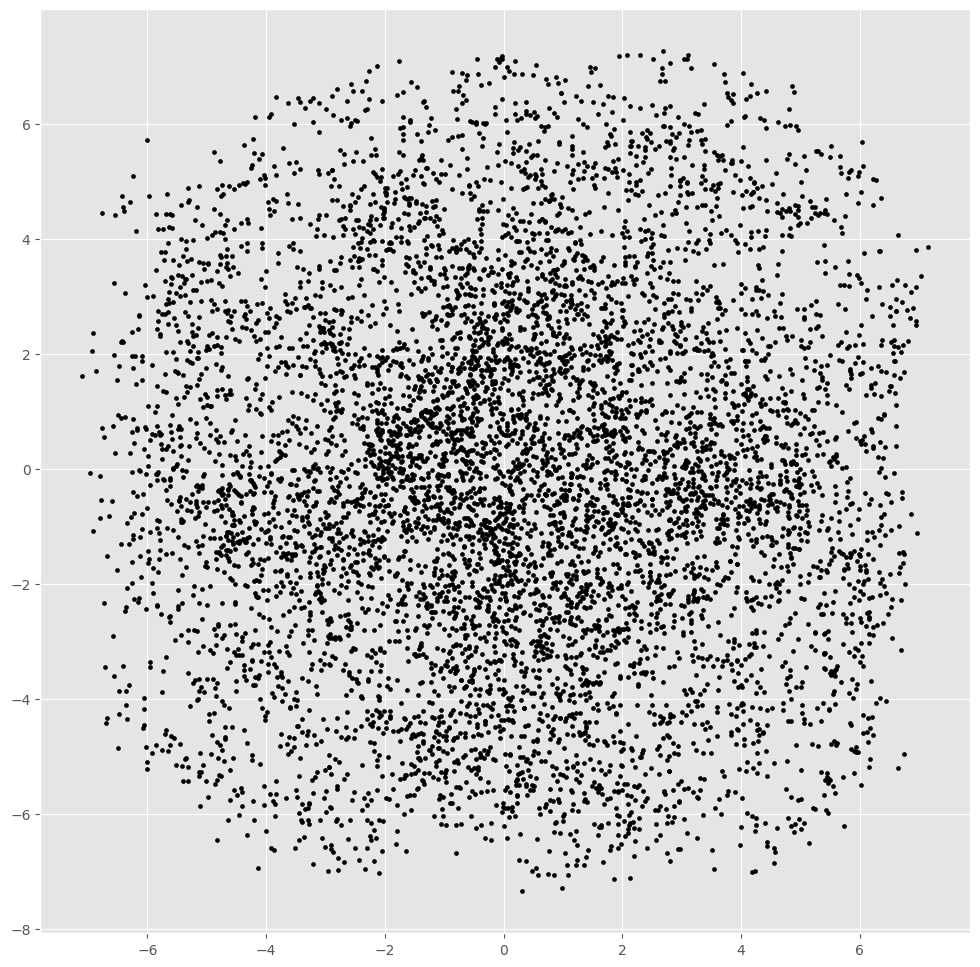

In [64]:
plt.figure(figsize=(12, 12))
for point in in_out_mod_data.index:
    inst = np.random.choice(70, 3, replace=False)
    #plt.scatter(point[0],point[1], c = "red")
    for i in inst:
        figure= in_out_mod_data.at[point,i]
        x = figure[:,0]
        y = figure[:,1]
        plt.scatter(x,y,s=8,color="black")
#plt.savefig('all_instances.png', dpi=300, bbox_inches='tight')

# How this data is formed? STEP 1

- <font size="4"> For each point in  the data, consider a circle of radious 3.</font>
- <font size="4"> For each point in  the data, choose 10 points on the circle according to normal distribution based on the distance to the data point. This is one instance.</font>
- <font size="4"> Repeat this process 70 times creating 70 instances representing a given 

In [68]:
file = open("Data/in_out_data", "rb")
in_out_data = pd.read_pickle(file)
file = open("Data/in_out_ref", "rb")
in_out_ref = pd.read_pickle(file)

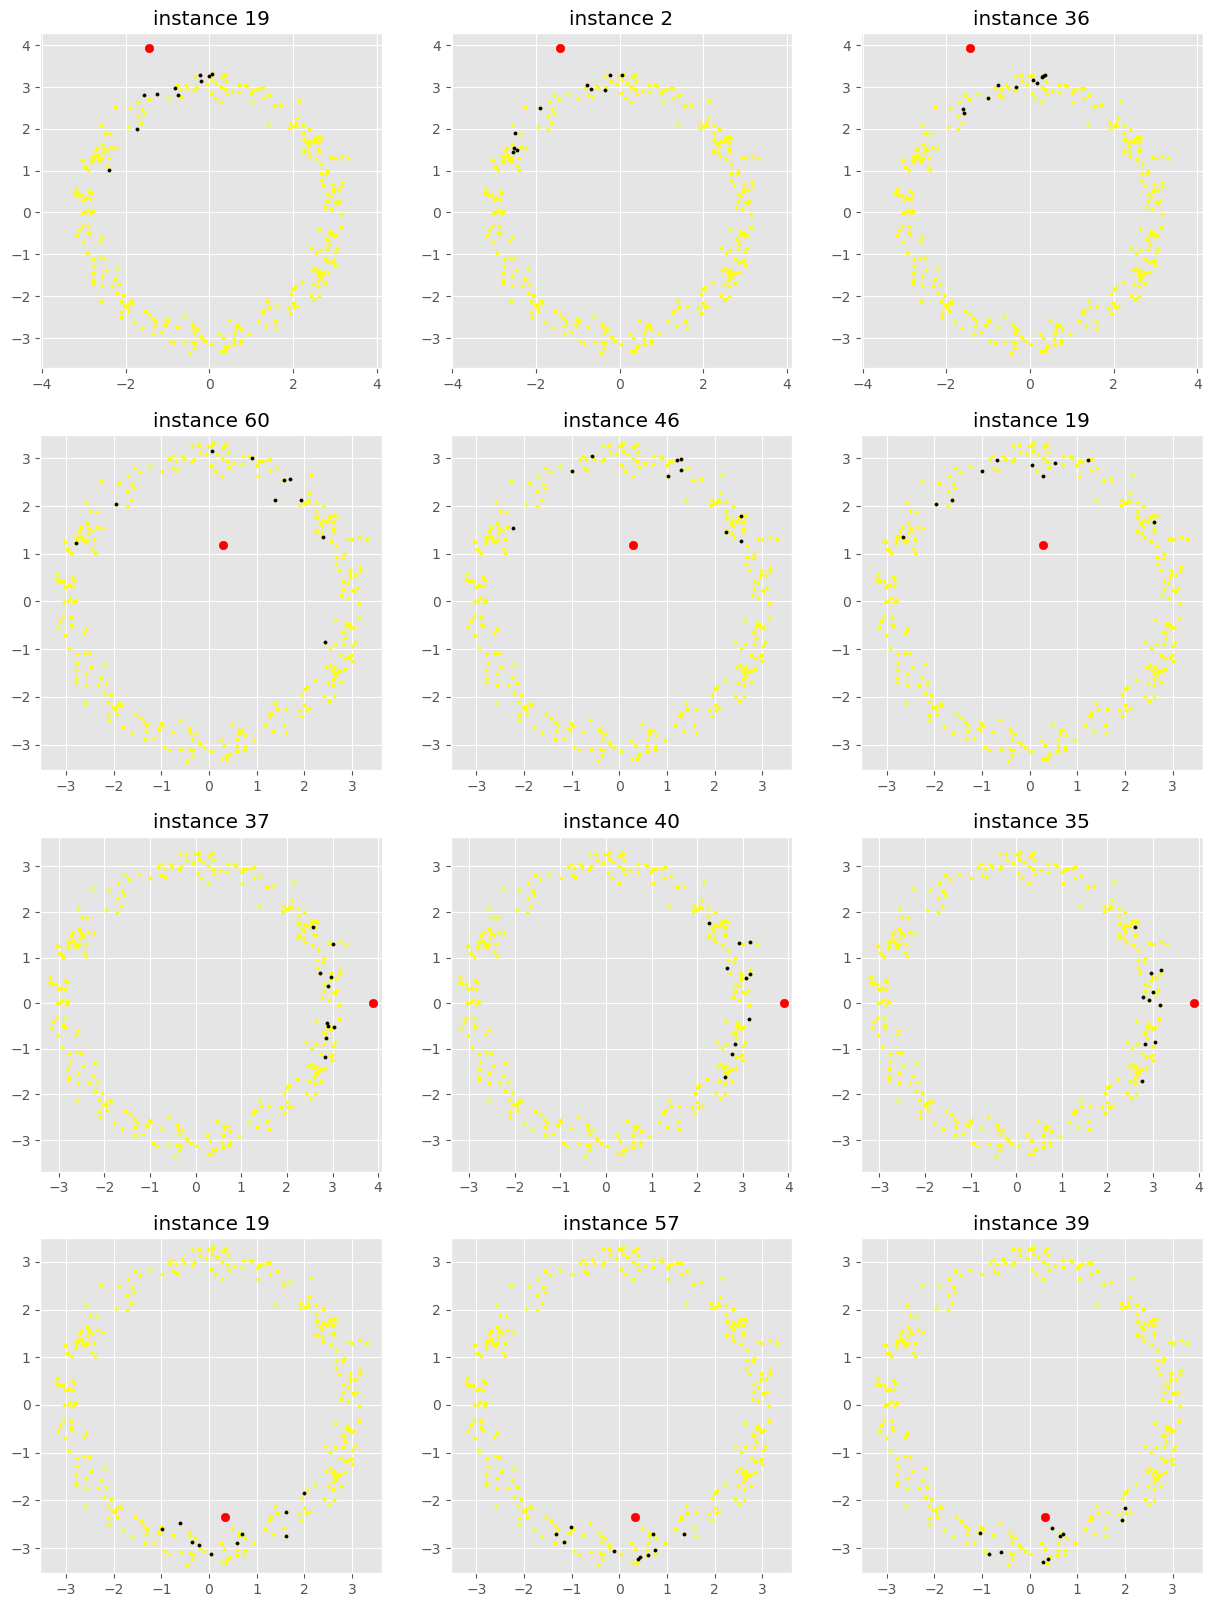

In [70]:
some_points = np.random.choice(250, 4, replace=False)
plt.figure(figsize=(15, 20))
i=1
for p in some_points:
    some_inst = np.random.choice(70,3, replace=False)
    for inst in some_inst:
        point = in_out_index[p]
        ax = plt.subplot(4,3,i)
        plt.axis('equal')
        ax.set_title("instance "+str(inst))
        figure = in_out_data.at[point,inst]
        plt.scatter(in_out_ref[:,0], in_out_ref[:,1], s=5, color = "yellow")
        plt.scatter(figure[:,0], figure[:,1], s=5, color = "black") 
        plt.scatter(point[0],point[1], c = "red")
        i = i+1       

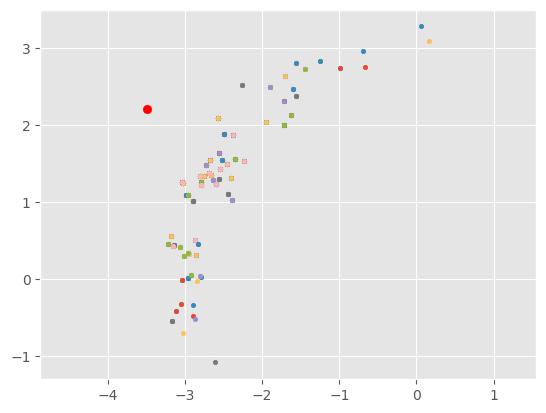

In [72]:
fig=plt.figure()
plt.axis('equal')
d = in_out_index[13]
plt.scatter(d[0],d[1], c = "red")
inst = 0
while inst < 70:
    figure = in_out_data.at[d,inst]
    x = figure[:,0]
    y = figure[:,1]
    plt.scatter(x,y,s=10)
    inst = inst+1

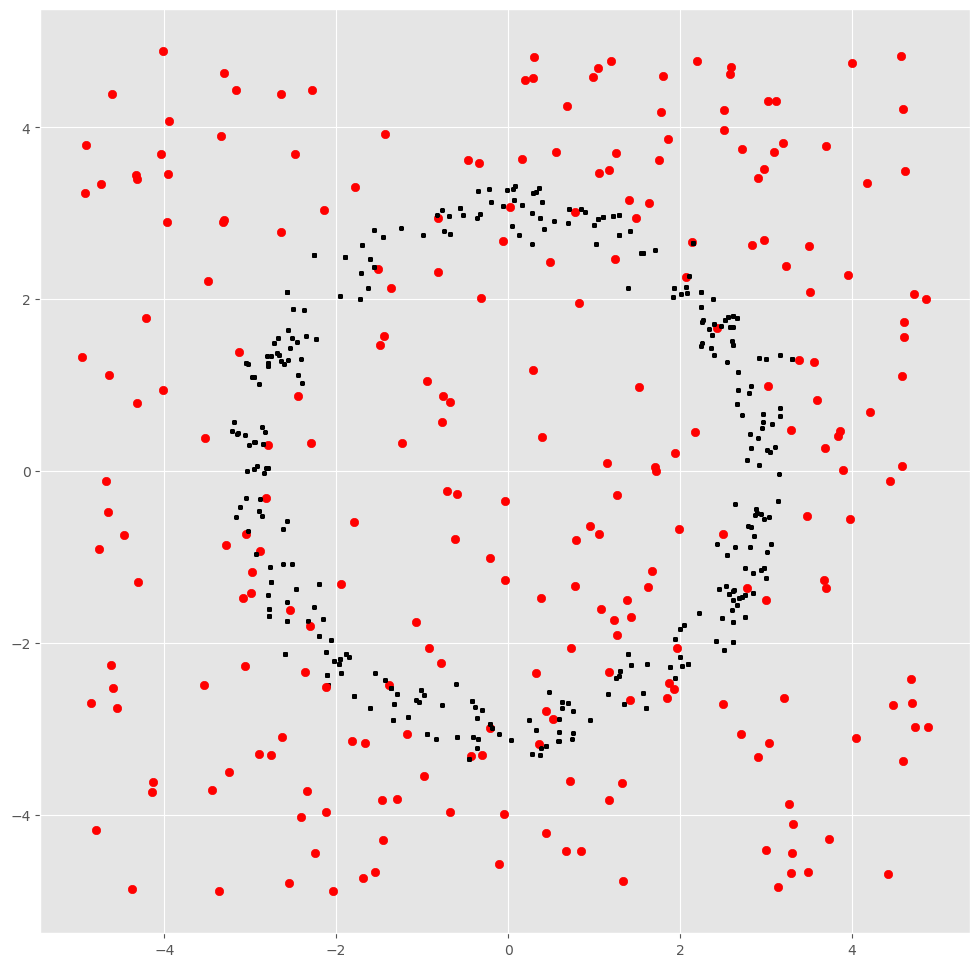

In [74]:
plt.figure(figsize=(12, 12))
for point in in_out_data.index:
    inst = np.random.choice(70, 3, replace=False)
    plt.scatter(point[0],point[1], c = "red")
    for i in inst:
        figure= in_out_data.at[point,i]
        x = figure[:,0]
        y = figure[:,1]
        plt.scatter(x,y,s=8,color="black")
        

# How this data is formed? STEP 2


- <font size="4"> Modify each instance, representing various data points, by translating it  by a random vector.</font>

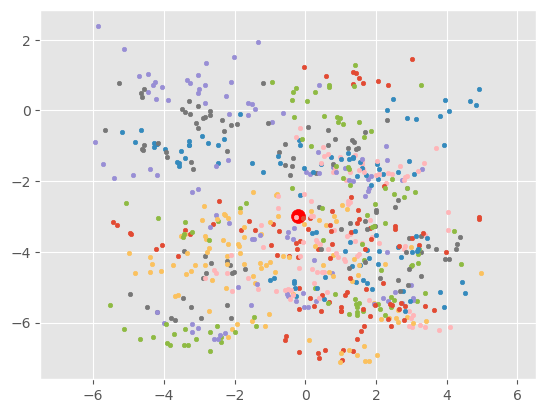

In [77]:
fig=plt.figure()
plt.axis('equal')
d = in_out_index[108]
plt.scatter(d[0],d[1],s = 100, c = "red")
inst = 0
while inst < 70:
    figure = in_out_mod_data.at[d,inst]
    x = figure[:,0]
    y = figure[:,1]
    plt.scatter(x,y,s=10)
    inst = inst+1

<font size="4"> Based on the data, can we discover some information that will shad some light about its formation?</font>



<img src= "pipelineH0.pdf" style ="width:900px"/> 

- <font size="4"> For every point $d$ in the data </font>
- <font size="4"> and for every instance $S_i$ in the set represetning the point $X_d$,</font>
- <font size="4"> let us convert $S_i$ into stable rank with resepect to the 4 clustering methods single, complete, average, and ward </font>

In [88]:
file = open("Data/in_out_H0_stable_rank", "rb")
in_out_H0_stable_rank = pd.read_pickle(file)

In [90]:
print(in_out_H0_stable_rank['single'])

                                                                                        0   \
(3.236737108491255, 2.3812557321200023)     <stablerank.rtorf.Pcnif object at 0x3ab6b7050>   
(2.840280708197099, 2.625583102097744)      <stablerank.rtorf.Pcnif object at 0x3958d7c10>   
(0.32512345648008356, -2.3461557843046137)  <stablerank.rtorf.Pcnif object at 0x3953e0350>   
(1.2454400669882748, 2.472404012240256)     <stablerank.rtorf.Pcnif object at 0x3953e3510>   
(-4.036496372122981, 3.6941143982603784)    <stablerank.rtorf.Pcnif object at 0x3953e15d0>   
...                                                                                    ...   
(-2.978380107983366, -1.1752378843711622)   <stablerank.rtorf.Pcnif object at 0x3ab504dd0>   
(4.583419350144279, 0.059166616436264974)   <stablerank.rtorf.Pcnif object at 0x3ab506110>   
(4.592116088990316, -3.3732249995756813)    <stablerank.rtorf.Pcnif object at 0x3ab506210>   
(-0.6198346234201892, -0.7885430295145301)  <stablerank.rtor

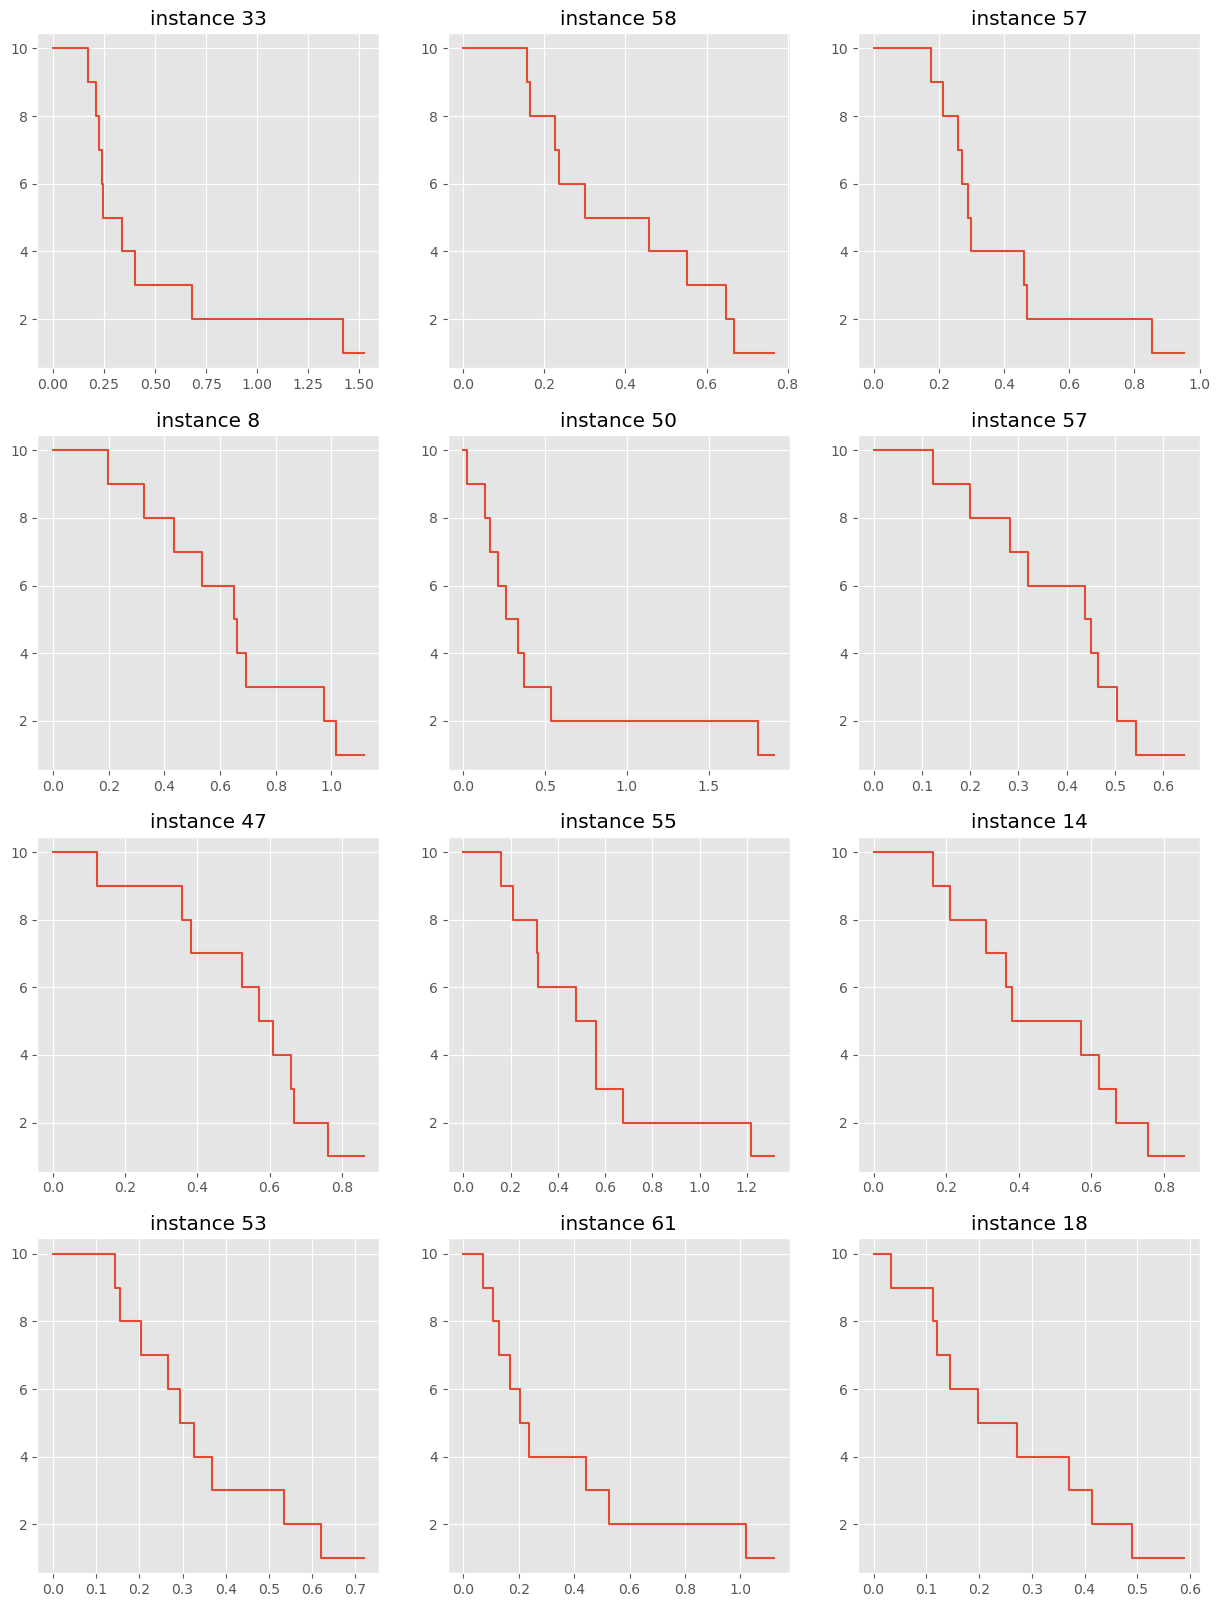

In [92]:
cm = "single"
some_points = np.random.choice(250, 4, replace=False)
plt.figure(figsize=(15, 20))
i=1
for p in some_points:
    some_inst = np.random.choice(70,3, replace=False)
    for inst in some_inst:
        point = in_out_index[p]
        ax = plt.subplot(4,3,i)
        #plt.axis('equal')
        ax.set_title("instance "+str(inst))
        in_out_H0_stable_rank[cm].at[point,inst].plot()
        i = i+1       


- <font size="4"> for every clustering methods (single, complete, average, and ward)
and every point $d$, take the averge of the stable ranks across all the instances </font>

In [95]:
file = open("Data/in_out_avg_H0_stable_rank", "rb")
in_out_avg_H0_stable_rank = pickle.load(file)



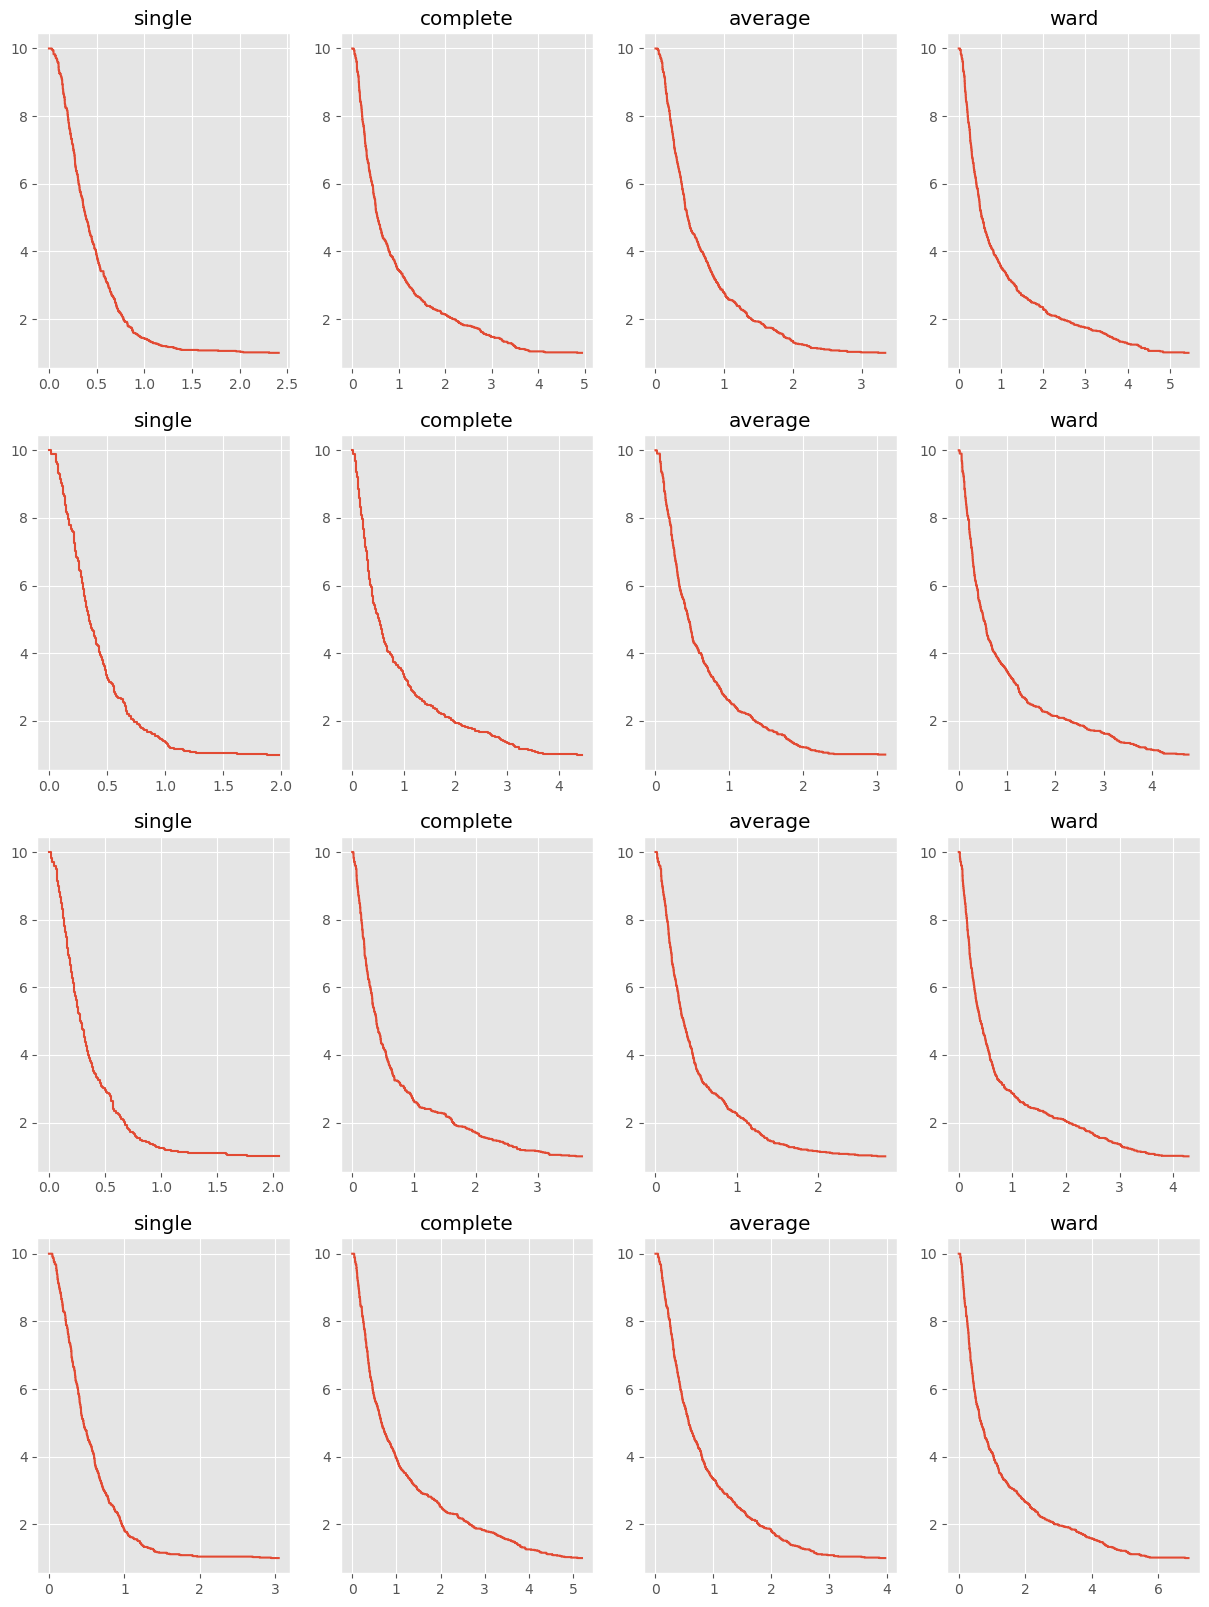

In [97]:
cm = "single"
some_points = np.random.choice(250, 4, replace=False)
plt.figure(figsize=(15, 20))
i=1
for p in some_points:
    point = in_out_index[p]
    for cm in ("single", "complete", "average","ward"):
        ax = plt.subplot(4,4,i)
        ax.set_title(cm)
        in_out_avg_H0_stable_rank[cm][point].plot()
        i = i+1

In [99]:
print(in_out_avg_H0_stable_rank)

{'single': {(3.236737108491255, 2.3812557321200023): <stablerank.rtorf.Pcnif object at 0x3aeacd190>, (2.840280708197099, 2.625583102097744): <stablerank.rtorf.Pcnif object at 0x3af0cf110>, (0.32512345648008356, -2.3461557843046137): <stablerank.rtorf.Pcnif object at 0x3af38b050>, (1.2454400669882748, 2.472404012240256): <stablerank.rtorf.Pcnif object at 0x3af3f1910>, (-4.036496372122981, 3.6941143982603784): <stablerank.rtorf.Pcnif object at 0x3af0b0cd0>, (1.4822986092561692, 2.9482175122873047): <stablerank.rtorf.Pcnif object at 0x3af1d4050>, (-0.6785771127593847, -3.9654571806194596): <stablerank.rtorf.Pcnif object at 0x3aec3f210>, (0.29183711201530826, 4.575004304230134): <stablerank.rtorf.Pcnif object at 0x3aec3c910>, (2.5117653158822986, 4.197937825607742): <stablerank.rtorf.Pcnif object at 0x3aec3e8d0>, (-0.7849005628449603, -2.236568845769934): <stablerank.rtorf.Pcnif object at 0x3aec3f990>, (-1.1779781117170307, -3.0596884589135342): <stablerank.rtorf.Pcnif object at 0x3aec3fcd

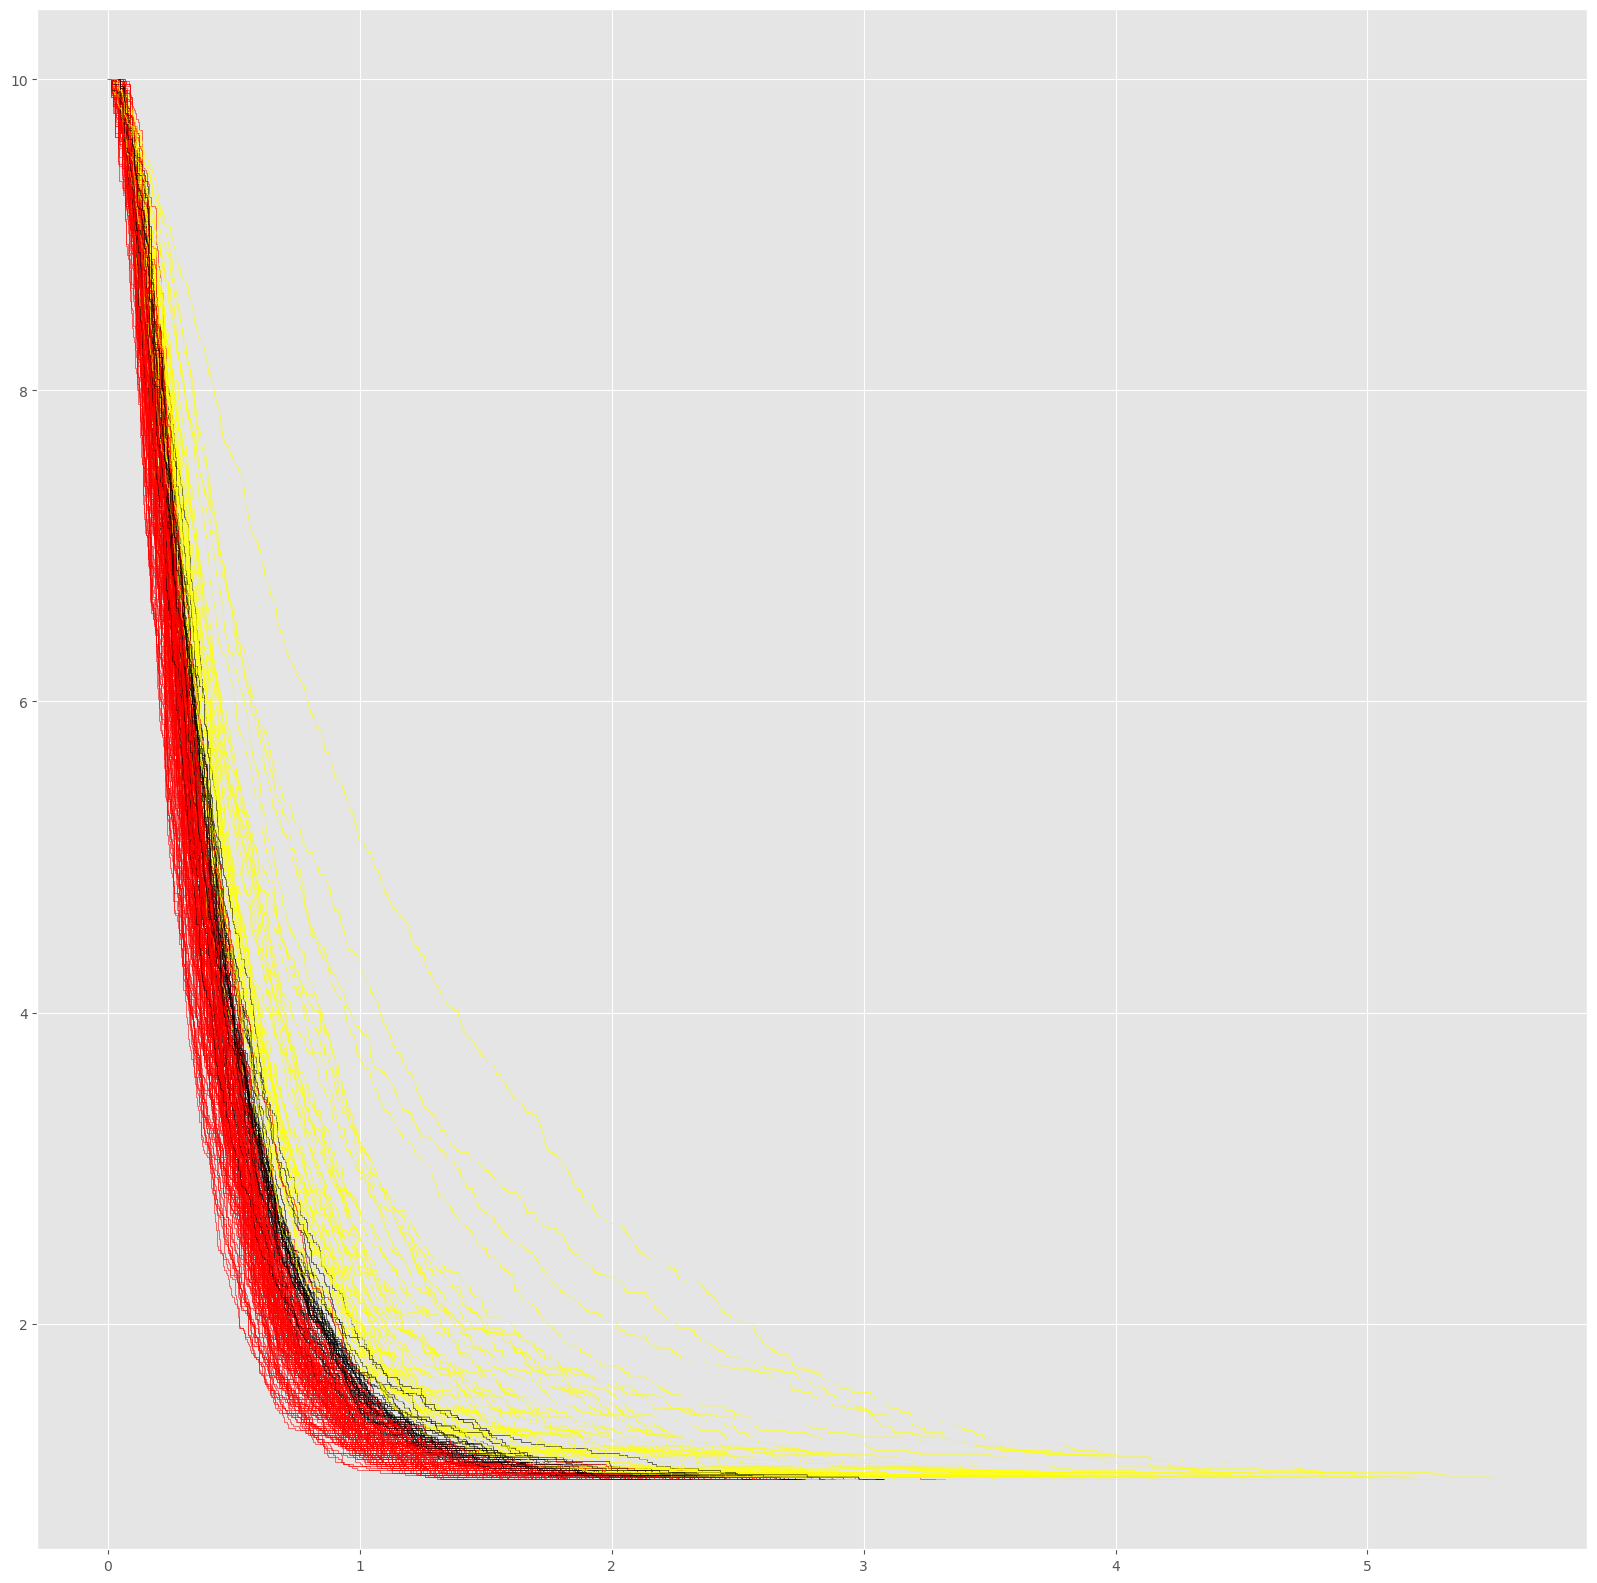

In [106]:
plt.figure(figsize=(20,20))
for point in in_out_index:
    if point[0]**2+point[1]**2 > 3.4**2:
        color = "red"
    elif point[0]**2+point[1]**2 >= 2.6**2:
        color = "black"
    else:
        color = "yellow"
    in_out_avg_H0_stable_rank["single"][point].plot(color = color,linewidth=0.4 )
        

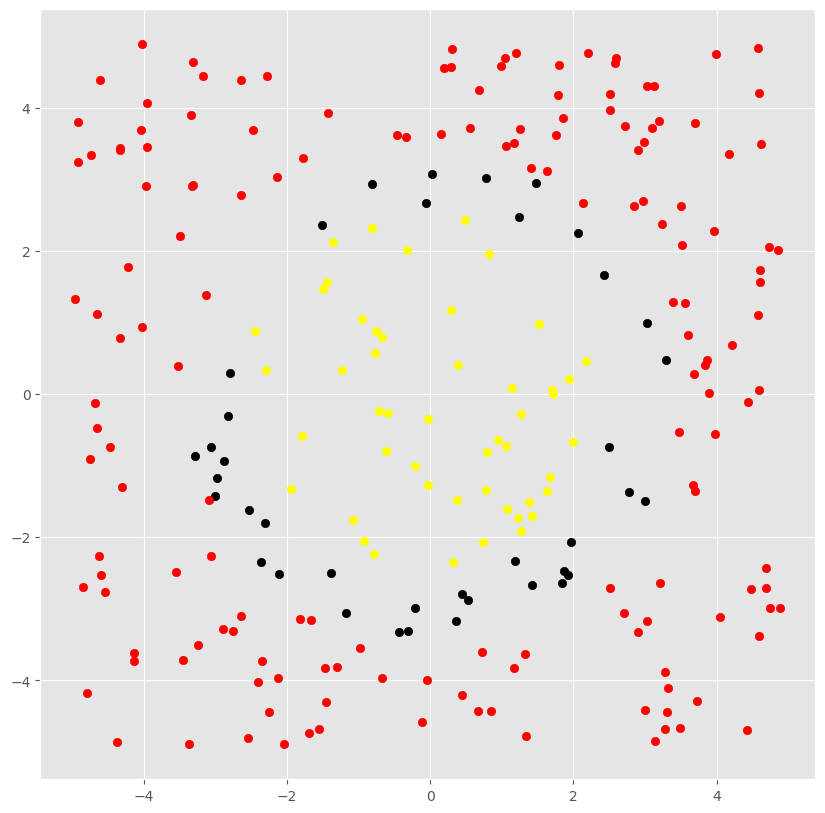

In [108]:
index = in_out_mod_data.index
plt.figure(figsize=(10,10))
plt.axis('equal')

for point in index:
    if point[0]**2+point[1]**2 > 3.4**2:
        color = "red"
    elif point[0]**2+point[1]**2 >= 2.6**2:
        color = "black"
    else:
        color = "yellow"
        
    plt.scatter(point[0],point[1], c = color)
    

# How this data is formed?


- <font size="4"> For each point in  the data, consider a circle of radious 3.</font>
- <font size="4"> For each point in  the data, choose 10 points on the circle according to normal distribution based on the distance to the data point. This is one instance.</font>
- <font size="4"> Repeat this process 70 times creating 70 instances representing a given data point.</font>
- <font size="4"> Modify each instance, representing various data points, by translating it  by a random vector.</font>

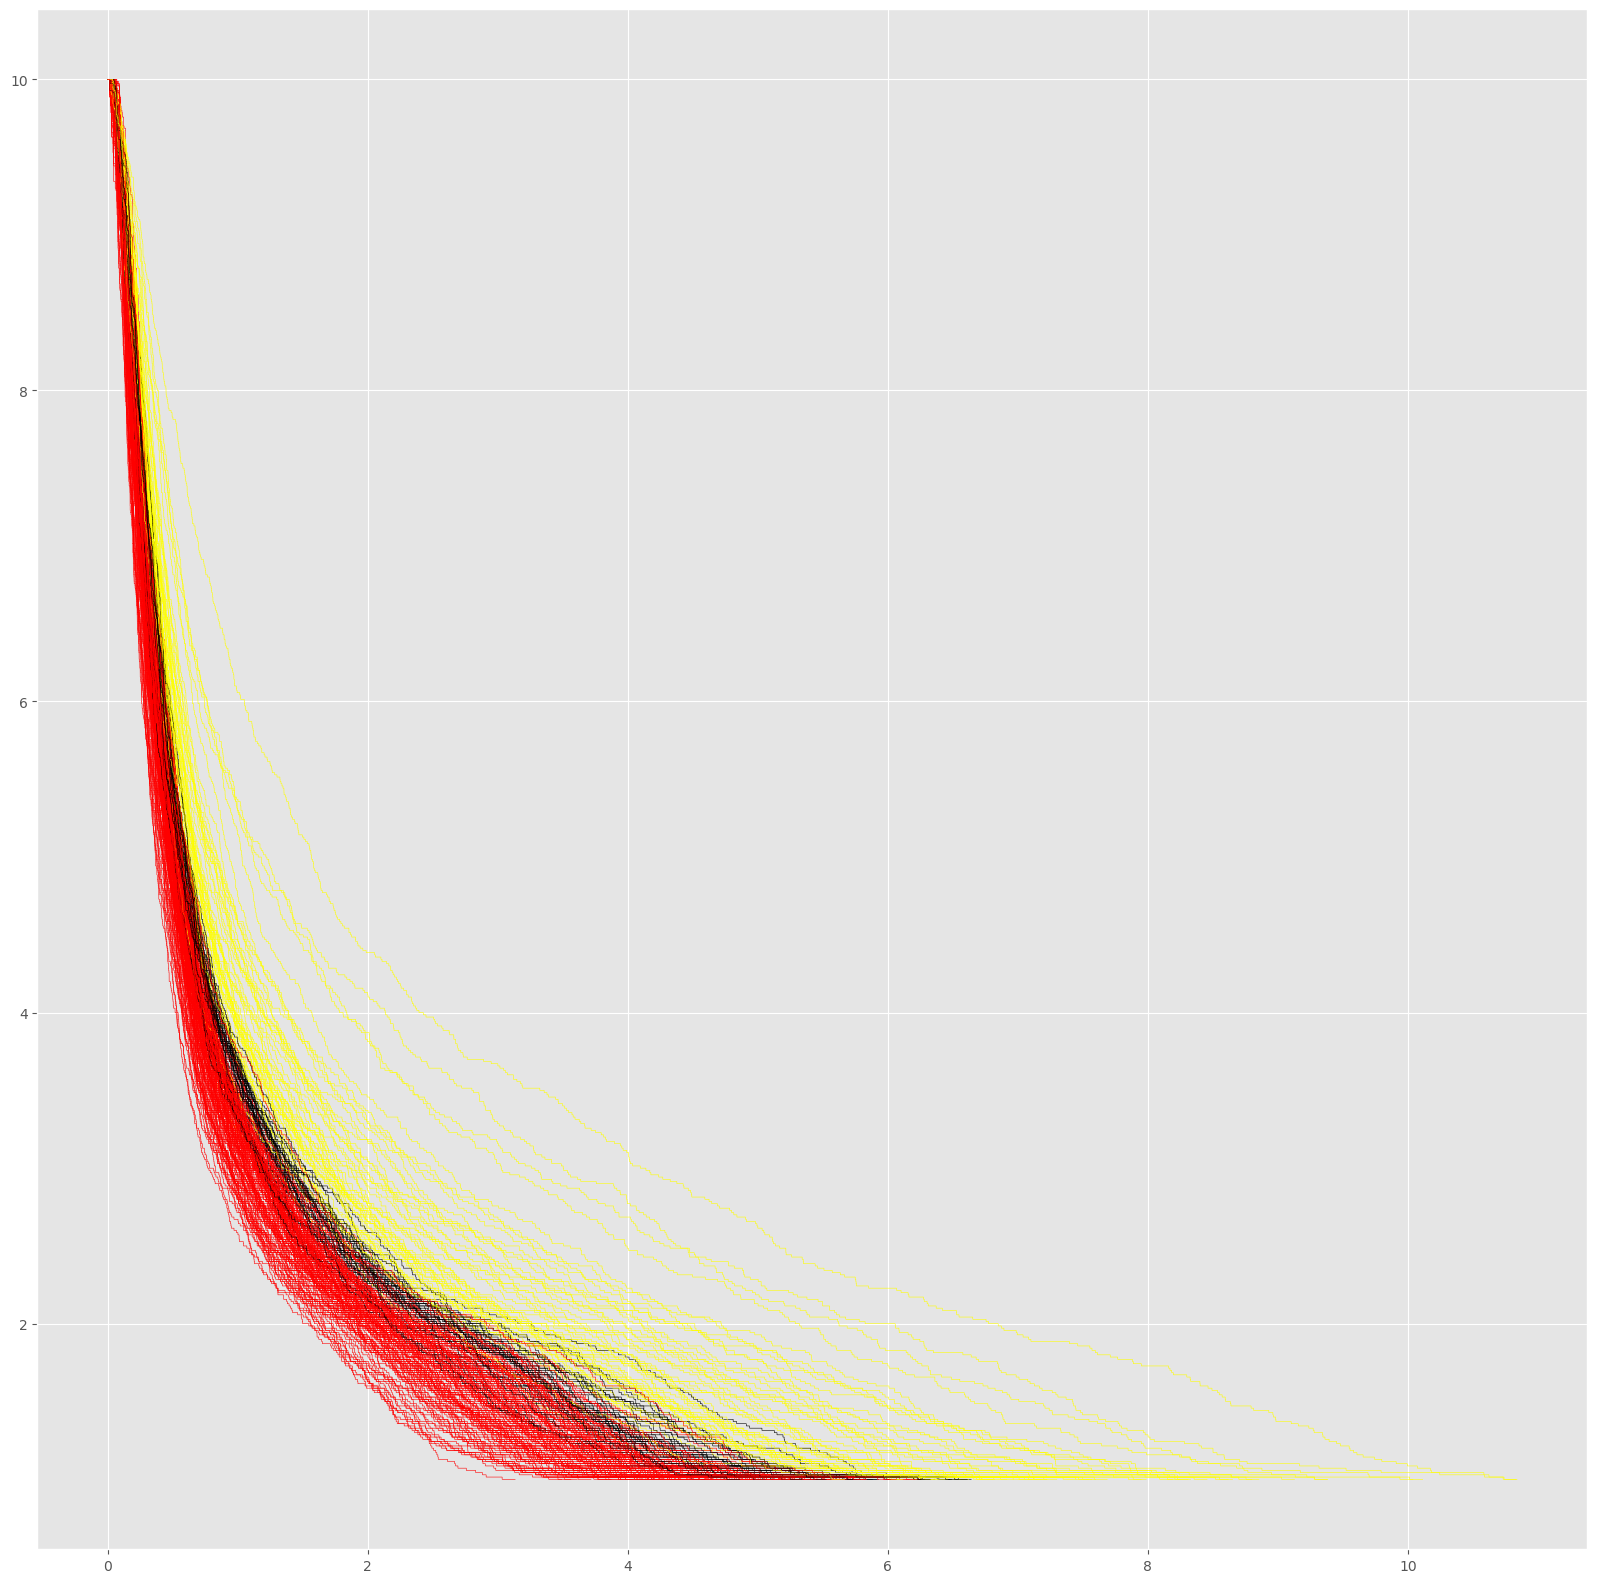

In [111]:
plt.figure(figsize=(20,20))
for point in index:
    if point[0]**2+point[1]**2 > 3.4**2:
        color = "red"
    elif point[0]**2+point[1]**2 >= 2.6**2:
        color = "black"
    else:
        color = "yellow"
    in_out_avg_H0_stable_rank["ward"][point].plot(linewidth=0.4, color = color)
        